# Housing Price Prediction Project

Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know :-

Which variables are important to predict the price of variable?

How do these variables describe the price of the house?

Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market..
Technical Requirements:
◾ Data contains 1460 entries each having 81 variables.

• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.

• Extensive EDA has to be performed to gain relationships of important variable and price.

• Data contains numerical as well as categorical variable. You need to handle them accordingly.

• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.

• You need to find important features which affect the price positively or negatively.

• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file.

--------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading train.csv file
train_df = pd.read_csv("trainh.csv")
train_df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   127         120       RL          NaN     4928   Pave   NaN      IR1   
1   889          20       RL         95.0    15865   Pave   NaN      IR1   
2   793          60       RL         92.0     9920   Pave   NaN      IR1   
3   110          20       RL        105.0    11751   Pave   NaN      IR1   
4   422          20       RL          NaN    16635   Pave   NaN      IR1   
5  1197          60       RL         58.0    14054   Pave   NaN      IR1   
6   561          20       RL          NaN    11341   Pave   NaN      IR1   
7  1041          20       RL         88.0    13125   Pave   NaN      Reg   
8   503          20       RL         70.0     9170   Pave   NaN      Reg   
9   576          50       RL         80.0     8480   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   
8         Lvl    AllPub  ...        0    NaN  GdPrv        Shed     400   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  
5     11   2006       New        Partial     219210  
6      5   2010        WD         Normal     121500  
7      1   2006        WD         Normal     155000  
8      4   2007        WD         Normal     140000  
9     10   2008       COD        Abnorml     118500  

[10 rows x 81 columns]

In [3]:
# Reading test.csv file
test_df = pd.read_csv("testh.csv")
test_df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   
5   650         180       RM         21.0     1936   Pave   NaN      Reg   
6  1453         180       RM         35.0     3675   Pave   NaN      Reg   
7   152          20       RL        107.0    13891   Pave   NaN      Reg   
8   427          80       RL          NaN    12800   Pave   NaN      Reg   
9   776         120       RM         32.0     4500   Pave   NaN      Reg   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN    NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN    NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
5         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
6         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
7         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
8         Low    AllPub  ...         396        0    NaN    NaN         NaN   
9         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  
5       0     12    2007        WD         Normal  
6       0      5    2006        WD         Normal  
7       0      1    2008       New        Partial  
8       0      8    2009        WD         Normal  
9       0      6    2009        WD         Normal  

[10 rows x 80 columns]

The datatsets contains both numerical and categorical data types. And we can notice missing values in some of the columns.The train dataset is comprised of both dependent variable (target) and independent variables. Here "SalesPrice" is our label which is continuous in nature so, it is a "Regression Type Problem" where I need to predict the sales price of the house and The test dataset contains only independent variables .So, I will use train dataset for building our model and then will use the test dataset for getting prediction from the trained model

# EDA

In [4]:
# Checking the dimensions of both train and test dataset
print("Shape of train dataset is:",train_df.shape)
print("Shape of test dataset is:",test_df.shape)

Shape of train dataset is: (1168, 81)
Shape of test dataset is: (292, 80)


In [5]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
test_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# Checking the type of train dataset
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [8]:
# Checking the type of test dataset
test_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

# As per different data types in the dataset ,it is needed to be encoded before Building a model

In [9]:
# To get good overview of the train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

This info() method gives the information about the dataset which includes indexing type, column type, no-null values and memory usage.Since counts of some of the columns are different, which means there are null values present in the dataset.

In [10]:
# To get good overview of the test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [11]:
# Checking number of unique values in each column of train dataset
train_df.nunique().to_frame("No of Unique Values")

No of Unique Values
Id                            1168
MSSubClass                      15
MSZoning                         5
LotFrontage                    106
LotArea                        892
...                            ...
MoSold                          12
YrSold                           5
SaleType                         9
SaleCondition                    6
SalePrice                      581

[81 rows x 1 columns]

Above are the number of unique values present in the columns of the train dataset.from the nunique() method we can notice the column "Id" is the unique Id number given to the house and it has no significance in the prediction so let's drop it.Also the column "Utilities" has only one unique value AllPub (All public Utilities) throughout the column, so it can be dropped as it won't affect the model.

In [12]:
# Dropping irrelevant columns
train_df.drop("Id",axis=1,inplace=True)
train_df.drop("Utilities",axis=1,inplace=True)

In [13]:
# Checking number of unique values in each column of test dataset
test_df.nunique().to_frame("No of Unique Values")

No of Unique Values
Id                             292
MSSubClass                      15
MSZoning                         4
LotFrontage                     65
LotArea                        249
...                            ...
MiscVal                          8
MoSold                          12
YrSold                           5
SaleType                         6
SaleCondition                    4

[80 rows x 1 columns]

# Above are the number of unique values present in the columns of the test dataset.Here also the column "Id" has no singnificance in the prediction. So I am going to remove it.The column "Utilities" also had been dropped in train dataset, so dropping the same column in test as well to keep the dimension of both the datasets same.

In [14]:
# Dropping irrelevant columns
test_df.drop("Id",axis=1,inplace=True)
test_df.drop("Utilities",axis=1,inplace=True)

In [15]:
# Checking the value counts of each columns of train dataset
for i in train_df.columns:
        print(train_df[i].value_counts())
        print('*'*100)

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
****************************************************************************************************
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
****************************************************************************************************
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
102.0      1
144.0      1
112.0      1
149.0      1
153.0      1
Name: LotFrontage, Length: 106, dtype: int64
****************************************************************************************************
9600     21
7200     18
6000     16
8400     14
9000     11
         ..
12803     1
9480      1
13478     1
12122     1
7861      1
Name: LotArea, Length: 892, dtype: int64
************************************

# These are the value counts of the columns present in the train dataset.

From the value count funtion I can observe most of the columns contains maximum amount of zero values which is even not required for the prediction.
The columns 'LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal' and 'BsmtFinSF2' have more than 90% zero values. So I am going to drop these columns.
Also some of the columns like BsmtFinSF, BsmtHalfBath, etc have large amount of zero values. Since I am assuming, the houses which have no basements could be calculated as zero square feet. So, I am keeping those columns as it is.

Let's take a quick look at the columns having maximum zero values by using below code.

# Dealing with zero values

In [16]:
Zero_value = pd.DataFrame(train_df.isin([0]).sum().sort_values(ascending=False))
Zero_value.columns=['Count of Zero values']
Zero_value['% of Zero values']=Zero_value['Count of Zero values']/11.68     # 1168/100 = 11.68
Zero_value

Count of Zero values  % of Zero values
PoolArea                      1161         99.400685
3SsnPorch                     1146         98.116438
LowQualFinSF                  1145         98.030822
MiscVal                       1126         96.404110
BsmtHalfBath                  1105         94.606164
...                            ...               ...
ExterQual                        0          0.000000
MasVnrType                       0          0.000000
Exterior2nd                      0          0.000000
Exterior1st                      0          0.000000
SalePrice                        0          0.000000

[79 rows x 2 columns]

In [17]:
## Dropping the columns containing maximum amount(90%) of zero values
train_df.drop(columns = ['LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','BsmtFinSF2'],inplace = True)

# Now let's check the value counts of test dataset

In [18]:
# Checking the value counts of each columns of test dataset
for i in test_df.columns:
        print(test_df[i].value_counts())
        print('*'*100)

20     108
60      55
50      31
120     18
30      17
160     16
80      15
90      11
70       7
180      4
190      4
45       2
75       2
85       1
40       1
Name: MSSubClass, dtype: int64
****************************************************************************************************
RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64
****************************************************************************************************
60.0    32
85.0    14
50.0    13
70.0    12
21.0     9
        ..
77.0     1
71.0     1
59.0     1
36.0     1
69.0     1
Name: LotFrontage, Length: 65, dtype: int64
****************************************************************************************************
7200     7
1680     4
5400     3
8450     3
9600     3
        ..
8280     1
9735     1
6979     1
12822    1
1953     1
Name: LotArea, Length: 249, dtype: int64
*************************************************************************************

# These are the value counts of the columns present in the test dataset.

Here also I can observe most of the columns contains maximum amount of zero values which is even not required for the prediction. The columns 'LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal' and 'BsmtFinSF2' have more than 90% zero values which is same as in the case of train dataset. So I am going to drop these columns.

In [19]:
# Dropping the columns containing maximum amount(90%) of zero values
test_df.drop(columns = ['LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','BsmtFinSF2'],inplace = True)

# Time variables in tain/test dataset

# From the Dataset we have 4 year variables YearBuilt, YearRemodAdd, GarageYrBlt and YrSold . Converting them into age variables seem more meaningful, as they offer more information about the longevity of the feature.Let's extract age information from the datetime variables by taking difference in years between the year the house was built and the year the house was sold

In [20]:
# Let's subtract built year by year sold in order to get  the age
train_df["AgeBuilt"] = train_df.YrSold - train_df.YearBuilt
train_df["AgeRemod"] = train_df.YrSold - train_df.YearRemodAdd
train_df["AgeGarage"] = train_df.YrSold - train_df.GarageYrBlt

In [21]:
# Dropping YearBuilt, YearRemodAdd and GarageYrBlt as I have already got the required value from it.
train_df.drop("YearBuilt",axis=1,inplace=True)
train_df.drop("YearRemodAdd",axis=1,inplace=True)
train_df.drop("GarageYrBlt",axis=1,inplace=True)

In [22]:
# Let's subtract built year by year sold in order to get  the age
test_df["AgeBuilt"] = test_df.YrSold - test_df.YearBuilt
test_df["AgeRemod"] = test_df.YrSold - test_df.YearRemodAdd
test_df["AgeGarage"] = test_df.YrSold - test_df.GarageYrBlt

In [23]:
# Dropping YearBuilt, YearRemodAdd and GarageYrBlt as I have already got the required value from it.
test_df.drop("YearBuilt",axis=1,inplace=True)
test_df.drop("YearRemodAdd",axis=1,inplace=True)
test_df.drop("GarageYrBlt",axis=1,inplace=True)

# Checking null values in train dataset

In [24]:
# Displaying the columns containing null values count and their % i.e. ((count of null)/1168)/100

train_null = pd.DataFrame(train_df[train_df.columns[train_df.isnull().any()]].isnull().sum())
train_null.columns=['Count of Null Values']
train_null['% of Null Values']=train_null['Count of Null Values']/11.68     # 1168/100 = 11.68
train_null

Count of Null Values  % of Null Values
LotFrontage                    214         18.321918
Alley                         1091         93.407534
MasVnrType                       7          0.599315
MasVnrArea                       7          0.599315
BsmtQual                        30          2.568493
BsmtCond                        30          2.568493
BsmtExposure                    31          2.654110
BsmtFinType1                    30          2.568493
BsmtFinType2                    31          2.654110
FireplaceQu                    551         47.174658
GarageType                      64          5.479452
GarageFinish                    64          5.479452
GarageQual                      64          5.479452
GarageCond                      64          5.479452
PoolQC                        1161         99.400685
Fence                          931         79.708904
MiscFeature                   1124         96.232877
AgeGarage                       64          5.479452

Above are the columns of train dataset containing null values. Let's treat these null values using appropriate imputation techniques.
The columns PoolQC, MiscFeature, Alley and Fence have null values more than 70%, filing them with imputation methods is meaningless. So let me drop them as they have no importance in the prediction

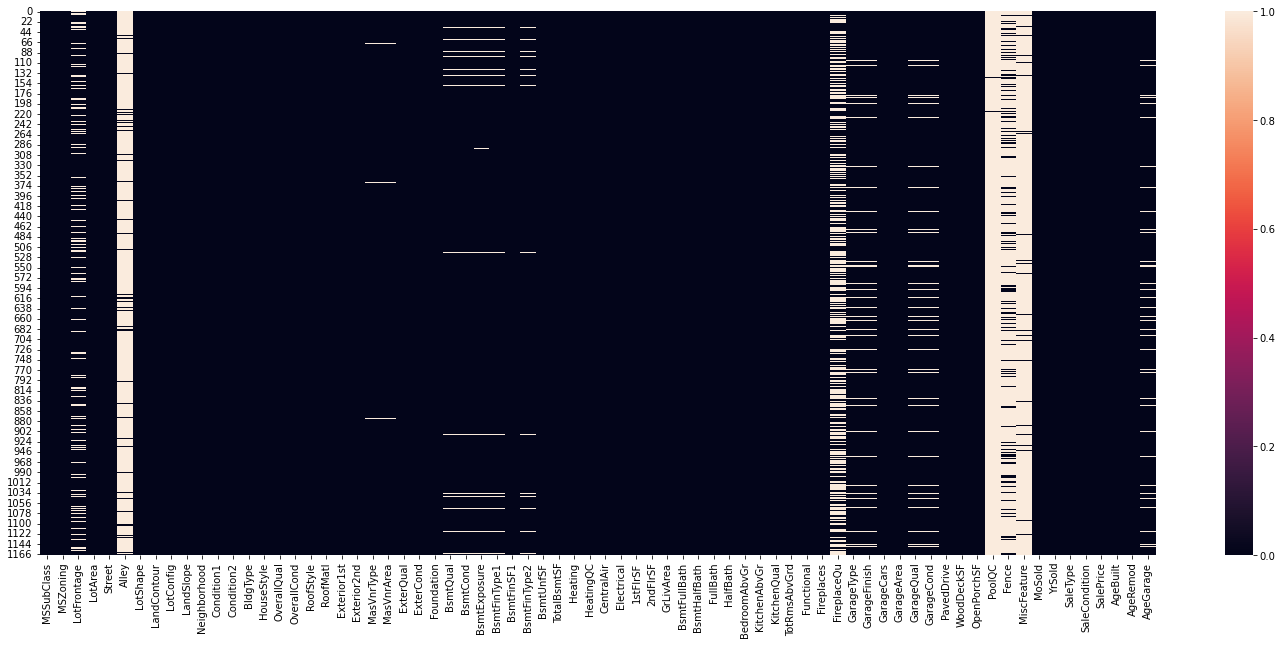

In [25]:
# Let's visualize the null values clearly using heat map
plt.figure(figsize=(25,10))
sns.heatmap(train_df.isnull(), cmap="rocket")
plt.show()

# Light color show Null Value

In [26]:
# Dropping the columns containing more than 70% of the null values
train_df.drop(["PoolQC", "MiscFeature", "Alley", "Fence"],axis=1,inplace=True)

# Treating null values using imputation techniques

1. The columns LotFrontage, MasVnrArea and GarageYrBlt are numerical in nature, let's fill the null values using mean values as there are no outliers present in these columns.

2. The remaining columns seems to be categorical so filling the null values using mode.

In [27]:
# Filling null values of object data column with their mode values (most frequently occurred values).

col1=train_df.columns.values
for i in range(0,len(col1)):
    if train_df[col1[i]].dtype == "object":
        train_df[col1[i]].fillna(train_df[col1[i]].mode()[0], inplace=True)

In [28]:
# Filling null values of numerical columns with their mean values

col2=train_df.columns.values
for i in range(0,len(col2)):
    if train_df[col2[i]].dtype != "object":
        train_df[col2[i]].fillna(train_df[col2[i]].mean(), inplace=True)

In [29]:
train_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
SaleCondition    0
SalePrice        0
AgeBuilt         0
AgeRemod         0
AgeGarage        0
Length: 68, dtype: int64

I have filled all the null values using mean and mode method. Let's visualize it using heat map.

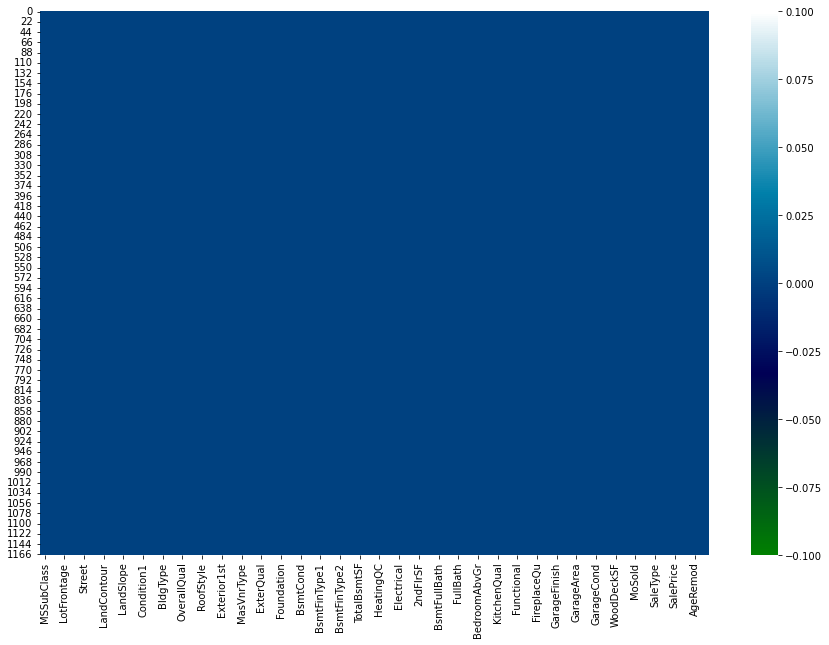

In [30]:
# Let's visualize the null values clearly using heat map
plt.figure(figsize=(15,10))
sns.heatmap(train_df.isnull(), cmap="ocean")
plt.show()

NO null value is present

# Checking null values in test dataset

In [31]:
# Displaying the columns containing null values count and their % i.e. ((count of null)/292)/100

test_null = pd.DataFrame(test_df[test_df.columns[test_df.isnull().any()]].isnull().sum())
test_null.columns=['Count of Null Values']
test_null['% of Null Values']=test_null['Count of Null Values']/2.92     # 292/100 = 11.68
test_null

Count of Null Values  % of Null Values
LotFrontage                     45         15.410959
Alley                          278         95.205479
MasVnrType                       1          0.342466
MasVnrArea                       1          0.342466
BsmtQual                         7          2.397260
BsmtCond                         7          2.397260
BsmtExposure                     7          2.397260
BsmtFinType1                     7          2.397260
BsmtFinType2                     7          2.397260
Electrical                       1          0.342466
FireplaceQu                    139         47.602740
GarageType                      17          5.821918
GarageFinish                    17          5.821918
GarageQual                      17          5.821918
GarageCond                      17          5.821918
PoolQC                         292        100.000000
Fence                          248         84.931507
MiscFeature                    282         96.575342
AgeGarage                       17          5.821918

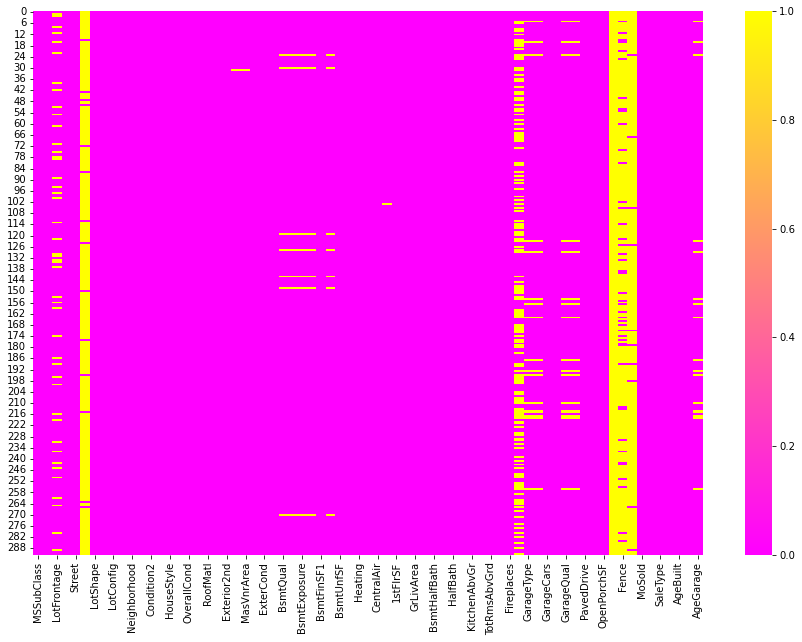

In [32]:
# Let's visualize the null values clearly using heat map
plt.figure(figsize=(15,10))
sns.heatmap(test_df.isnull(), cmap="spring")
plt.show()

In [33]:
# Dropping the columns containing more than 70% of the null values
test_df.drop(["PoolQC", "MiscFeature", "Alley", "Fence"],axis=1,inplace=True)

# Treating null values using imputation techniques

The columns LotFrontage, MasVnrArea and GarageYrBlt are numerical in nature, let's fill the null values using mean values as there are no outliers present in these columns.

The remaining columns seems to be categorical so filling the null values using mode method.

In [34]:
# Filling null values of object data column with their mode values (most frequently occurred values).

cols1=test_df.columns.values
for i in range(0,len(cols1)):
    if test_df[cols1[i]].dtype == "object":
        test_df[cols1[i]].fillna(test_df[cols1[i]].mode()[0], inplace=True)

In [35]:
# Filling null values of numerical columns with their mean values

cols2=test_df.columns.values
for i in range(0,len(cols2)):
    if test_df[cols2[i]].dtype != "object":
        test_df[cols2[i]].fillna(test_df[cols2[i]].mean(), inplace=True)

In [36]:
test_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
SaleType         0
SaleCondition    0
AgeBuilt         0
AgeRemod         0
AgeGarage        0
Length: 67, dtype: int64

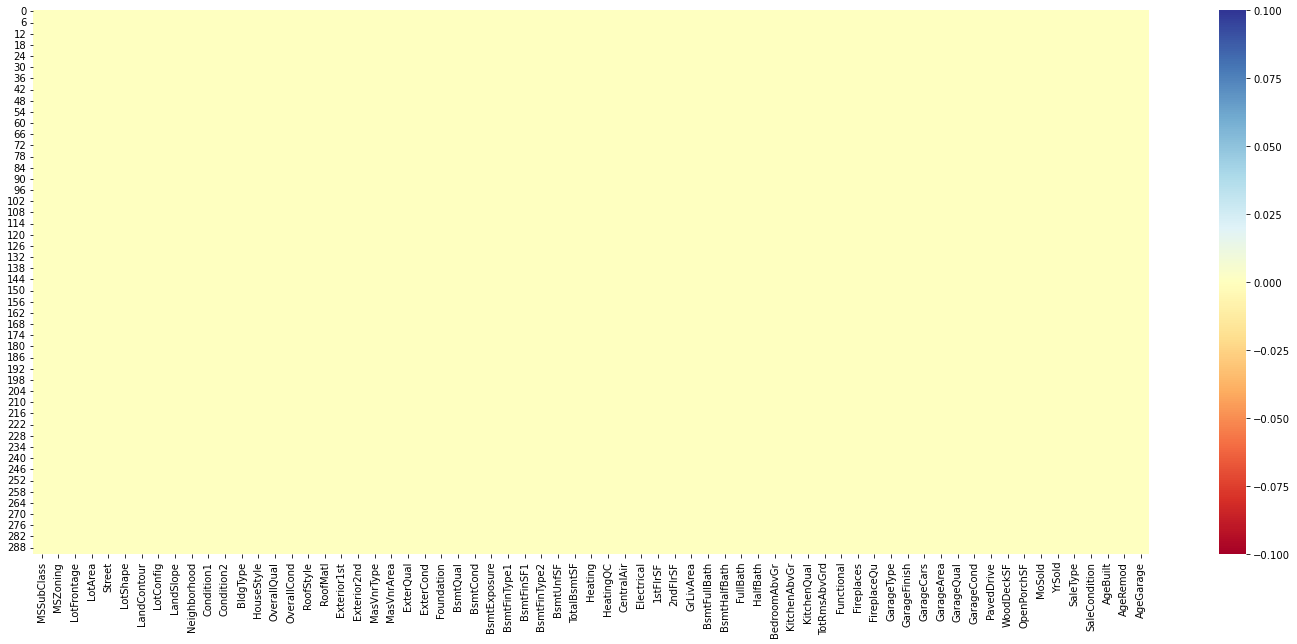

In [37]:
# Let's visualize the null values clearly using heat map
plt.figure(figsize=(25,10))
sns.heatmap(test_df.isnull(), cmap="RdYlBu")
plt.show()

In [38]:
# Checking the uniqueness of target column
train_df["SalePrice"].unique()

array([128000, 268000, 269790, 190000, 215000, 219210, 121500, 155000,
       140000, 118500, 119500, 237000, 201000, 126500, 135500, 165000,
       120500, 194500, 148000, 106000, 231500, 133000, 142125, 136500,
       146000, 217000, 112000, 394432, 113000, 188700, 319900, 135000,
       128500, 169000, 122000, 152000, 243000, 156000,  79500, 132000,
       144152, 130000, 149900, 124500, 179000, 147000,  39300, 312500,
       256000,  60000, 153000,  84900, 230000, 180000, 106500, 239000,
       107500, 123000, 176000, 228500, 117500, 350000, 200624, 173000,
       225000,  84500, 174900,  79000, 297000,  87000, 465000, 204900,
       127000, 159000, 170000, 159500, 102000, 109500, 163990, 189950,
       119000, 157500, 287000, 144000, 286000, 172000, 212000, 124000,
       150000, 205950, 251000, 129000, 223500, 475000, 335000, 115000,
       205000, 209500, 176432, 171000, 302000, 259500, 141000, 187500,
       385000, 275000, 108000,  89500, 109900, 185000, 143000, 127500,
      

In [39]:
# Checking the dimensions of both train and test dataset
print("Shape of train dataset is:",train_df.shape)
print("Shape of test dataset is:",test_df.shape)

Shape of train dataset is: (1168, 68)
Shape of test dataset is: (292, 67)


# Now Lets Separate numerical and categorical columns

# In train dataset

In [40]:
# Checking for categorical columns
categorical_coltr=[]
for i in train_df.dtypes.index:
    if train_df.dtypes[i]=='object':
        categorical_coltr.append(i)
print("Categorical columns in train dataset are:\n",categorical_coltr)

Categorical columns in train dataset are:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [41]:
# Now checking for numerical columns
numerical_coltr=[]
for i in train_df.dtypes.index:
    if train_df.dtypes[i]!='object':
        numerical_coltr.append(i)
print("Numerical columns in train dataset are:\n",numerical_coltr)

Numerical columns in train dataset are:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice', 'AgeBuilt', 'AgeRemod', 'AgeGarage']


# In test dataset

In [42]:
# Checking for categorical columns
categorical_coltest=[]
for i in test_df.dtypes.index:
    if test_df.dtypes[i]=='object':
        categorical_coltest.append(i)
print("Categorical columns in test dataset are:\n",categorical_coltest)

Categorical columns in test dataset are:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [43]:
# Now checking for numerical columns
numerical_coltest=[]
for i in test_df.dtypes.index:
    if test_df.dtypes[i]!='object':
        numerical_coltest.append(i)
print("Numerical columns in test dataset are:\n",numerical_coltest)

Numerical columns in test dataset are:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'AgeBuilt', 'AgeRemod', 'AgeGarage']


# DESCRIPTIVE STATISTICS

# Train

In [44]:
# Statistical summary of dataset
train_df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.988470   10484.749144     6.104452     5.595890   
std      41.940650    22.437056    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.988470    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  ...   
mean    102.310078   444.726027   569.721747  1061.095034  1169.860445  ...   
std     182.047152   462.664785   449.375525   442.272249   391.161983  ...   
min       0.000000     0.000000     0.000000     0.000000   334.000000  ...   
25%       0.000000     0.000000   216.000000   799.000000   892.000000  ...   
50%       0.000000   385.500000   474.000000  1005.500000  1096.500000  ...   
75%     160.000000   714.500000   816.000000  1291.500000  1392.000000  ...   
max    1600.000000  5644.000000  2336.000000  6110.000000  4692.000000  ...   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF       MoSold  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      1.776541   476.860445    96.206336    46.559932     6.344178   
std       0.745554   214.466769   126.158988    66.381023     2.686352   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%       1.000000   338.000000     0.000000     0.000000     5.000000   
50%       2.000000   480.000000     0.000000    24.000000     6.000000   
75%       2.000000   576.000000   171.000000    70.000000     8.000000   
max       4.000000  1418.000000   857.000000   547.000000    12.000000   

            YrSold      SalePrice     AgeBuilt     AgeRemod    AgeGarage  
count  1168.000000    1168.000000  1168.000000  1168.000000  1168.000000  
mean   2007.804795  181477.005993    36.874144    23.046233    29.608696  
std       1.329738   79105.586863    30.193130    20.783486    24.247703  
min    2006.000000   34900.000000     0.000000    -1.000000     0.000000  
25%    2007.000000  130375.000000     8.000000     4.000000     7.000000  
50%    2008.000000  163995.000000    36.000000    14.000000    29.608696  
75%    2009.000000  215000.000000    54.000000    42.000000    46.250000  
max    2010.000000  755000.000000   135.000000    60.000000   107.000000  

[8 rows x 30 columns]

# This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

# Test

In [45]:
# Statistical summary of dataset
test_df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  292.000000   292.000000     292.000000   292.000000   292.000000   
mean    57.414384    66.425101   10645.143836     6.078767     5.493151   
std     43.780649    19.975962   13330.669795     1.356147     1.063267   
min     20.000000    21.000000    1526.000000     3.000000     3.000000   
25%     20.000000    57.750000    7200.000000     5.000000     5.000000   
50%     50.000000    66.425101    9200.000000     6.000000     5.000000   
75%     70.000000    76.000000   11658.750000     7.000000     6.000000   
max    190.000000   150.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count   292.000000   292.000000   292.000000   292.000000   292.000000  ...   
mean    109.171821   439.294521   557.315068  1042.767123  1133.691781  ...   
std     174.729023   429.559675   411.043768   424.561153   366.941919  ...   
min       0.000000     0.000000     0.000000     0.000000   372.000000  ...   
25%       0.000000     0.000000   255.000000   771.750000   858.000000  ...   
50%       0.000000   369.500000   487.000000   971.000000  1047.500000  ...   
75%     180.000000   700.500000   780.000000  1322.000000  1370.500000  ...   
max    1031.000000  1767.000000  1935.000000  3094.000000  2402.000000  ...   

       Fireplaces  GarageCars   GarageArea  WoodDeckSF  OpenPorchSF  \
count  292.000000  292.000000   292.000000  292.000000   292.000000   
mean     0.595890    1.729452   457.458904   86.397260    47.061644   
std      0.621259    0.754430   210.785591  121.898836    65.865449   
min      0.000000    0.000000     0.000000    0.000000     0.000000   
25%      0.000000    1.000000   300.000000    0.000000     0.000000   
50%      1.000000    2.000000   467.500000    0.000000    28.500000   
75%      1.000000    2.000000   569.750000  149.250000    66.000000   
max      2.000000    4.000000  1052.000000  728.000000   418.000000   

           MoSold       YrSold    AgeBuilt    AgeRemod   AgeGarage  
count  292.000000   292.000000  292.000000  292.000000  292.000000  
mean     6.232877  2007.859589   35.243151   22.565068   28.090909  
std      2.774556     1.322867   30.494309   20.089470   23.145196  
min      1.000000  2006.000000    0.000000    0.000000    0.000000  
25%      4.000000  2007.000000    6.750000    4.000000    6.000000  
50%      6.000000  2008.000000   32.000000   14.000000   28.090909  
75%      8.000000  2009.000000   53.250000   39.250000   42.000000  
max     12.000000  2010.000000  136.000000   60.000000   90.000000  

[8 rows x 29 columns]

# Univariate Analysis

In [46]:
def generate_pie(i):
    plt.figure(figsize=(10,5))
    plt.pie(i.value_counts(), labels=i.value_counts().index, autopct='%1.2f%%',shadow=True,)
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()
    

Pie plot for the column: Street
Pave    1164
Grvl       4
Name: Street, dtype: int64


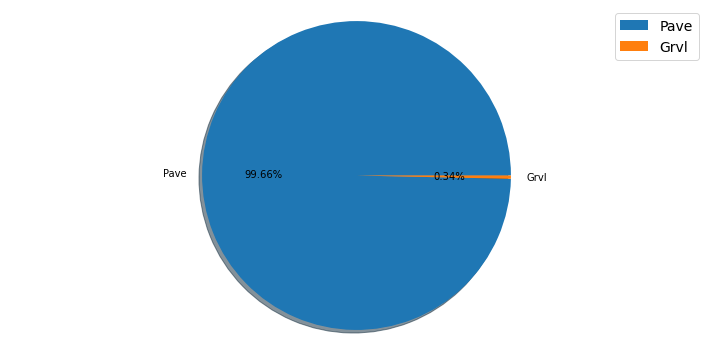

*****************************************************************************************************************************
Pie plot for the column: LotShape
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


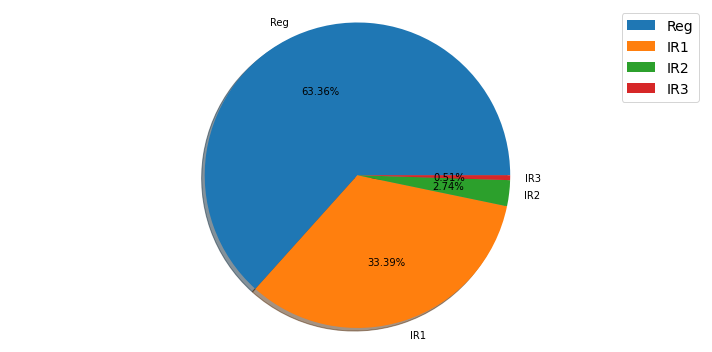

*****************************************************************************************************************************
Pie plot for the column: LandContour
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


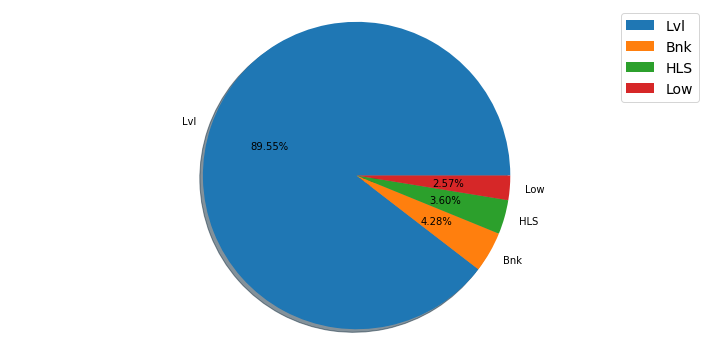

*****************************************************************************************************************************
Pie plot for the column: LandSlope
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


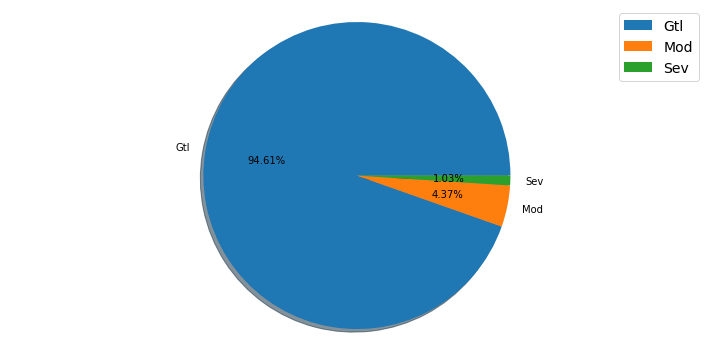

*****************************************************************************************************************************
Pie plot for the column: MasVnrType
None       703
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64


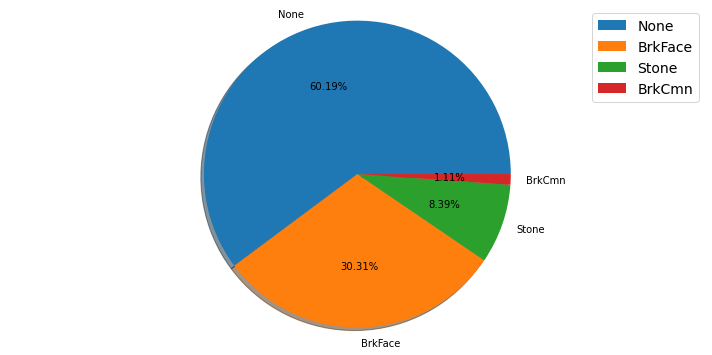

*****************************************************************************************************************************
Pie plot for the column: ExterQual
TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64


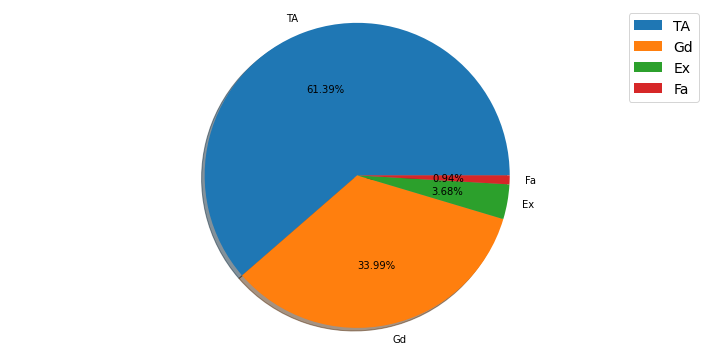

*****************************************************************************************************************************
Pie plot for the column: BsmtQual
TA    547
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64


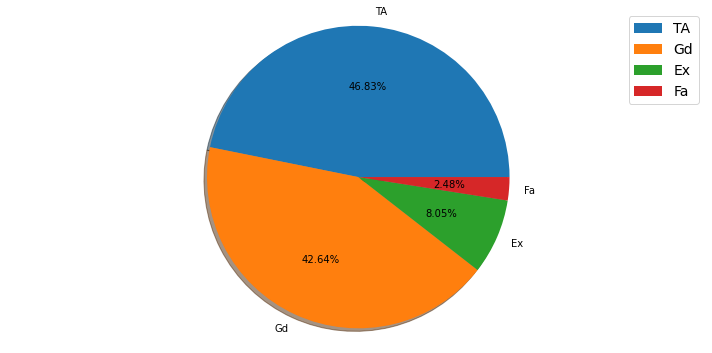

*****************************************************************************************************************************
Pie plot for the column: BsmtCond
TA    1071
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64


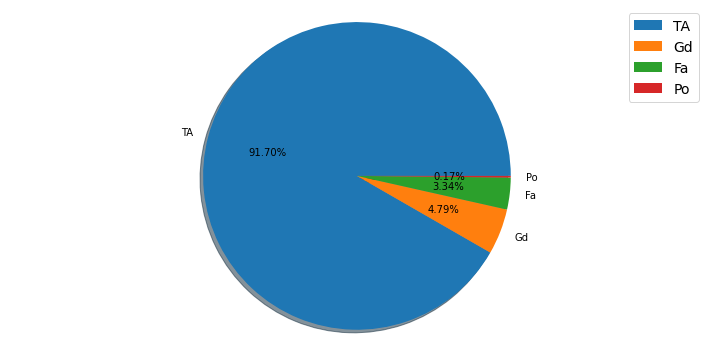

*****************************************************************************************************************************
Pie plot for the column: BsmtExposure
No    787
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64


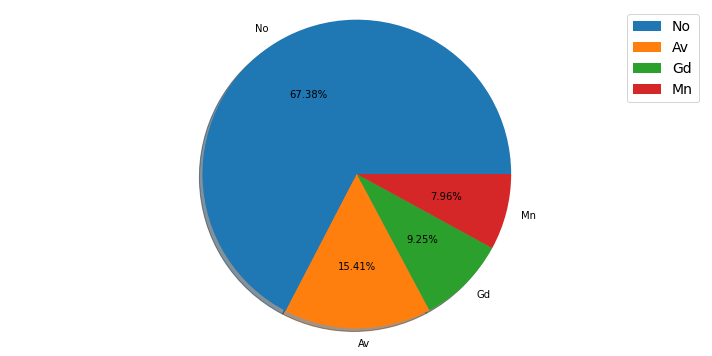

*****************************************************************************************************************************
Pie plot for the column: CentralAir
Y    1090
N      78
Name: CentralAir, dtype: int64


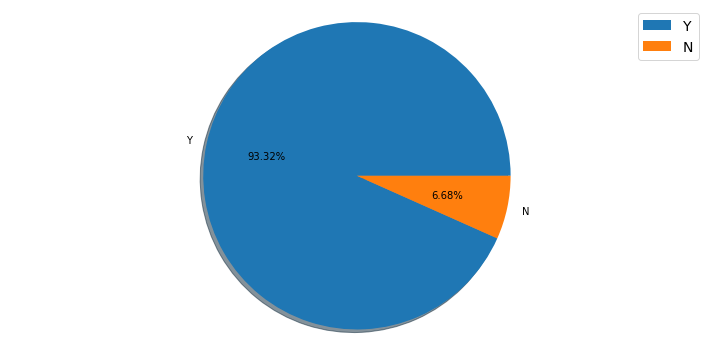

*****************************************************************************************************************************
Pie plot for the column: KitchenQual
TA    578
Gd    478
Ex     82
Fa     30
Name: KitchenQual, dtype: int64


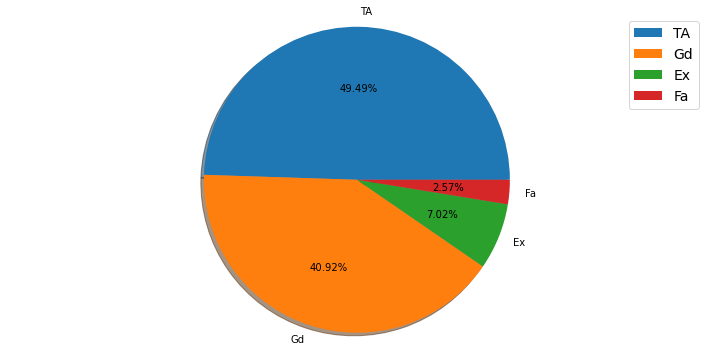

*****************************************************************************************************************************
Pie plot for the column: GarageFinish
Unf    551
RFn    339
Fin    278
Name: GarageFinish, dtype: int64


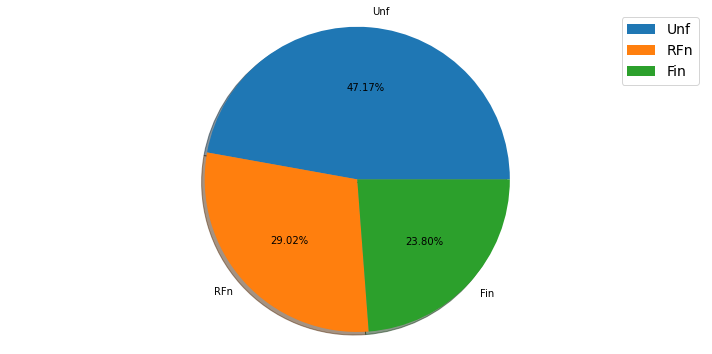

*****************************************************************************************************************************
Pie plot for the column: PavedDrive
Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64


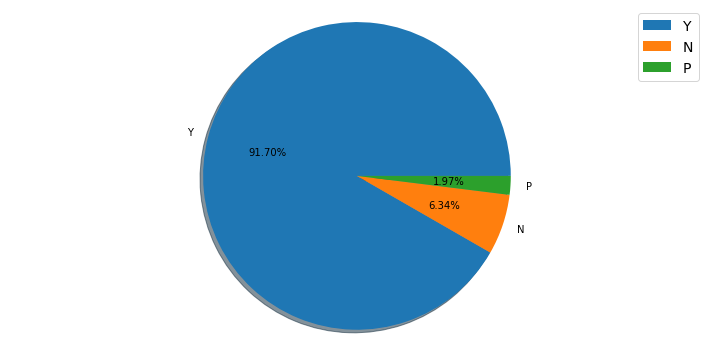

*****************************************************************************************************************************


In [47]:
cols1 = ['Street', 'LotShape','LandContour','LandSlope', 'MasVnrType','ExterQual','BsmtQual','BsmtCond','BsmtExposure','CentralAir','KitchenQual','GarageFinish','PavedDrive']

plotnumber=1
for j in train_df[cols1]:
    print(f"Pie plot for the column:", j)
    print(train_df[j].value_counts())
    generate_pie(train_df[j])
    print("*"*125)

In [48]:
def value_count(column):
    counts=len(train_df[column].value_counts())
    if counts<3:
        plt.figure(figsize=(8,5))
    elif counts<5:
        plt.figure(figsize=(8,5))
        plt.xticks(rotation=90)
    elif counts<10:
        plt.figure(figsize=(10,6))
        plt.xticks(rotation=90)
    else:
        plt.figure(figsize=(10,8))
        plt.xticks(rotation=90)
    sns.countplot(x=column,data=train_df,palette="Dark2")
    plt.show()
    print("*"*125)

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


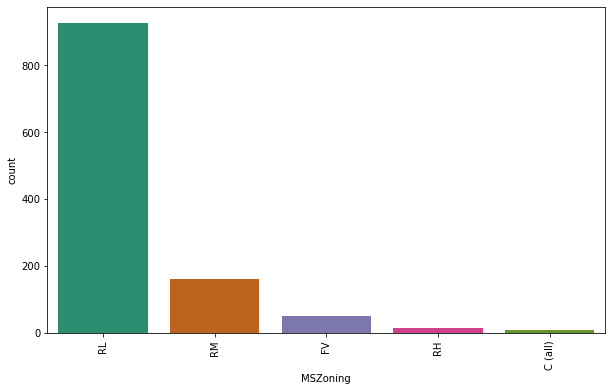

*****************************************************************************************************************************
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


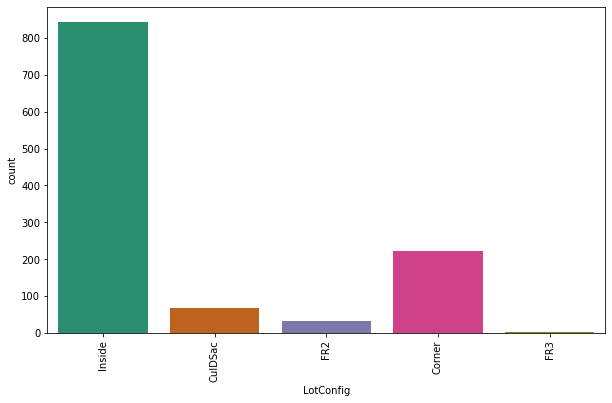

*****************************************************************************************************************************
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64


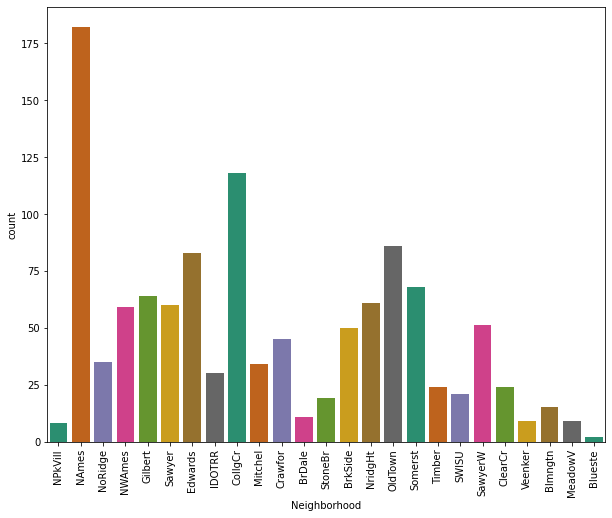

*****************************************************************************************************************************
Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64


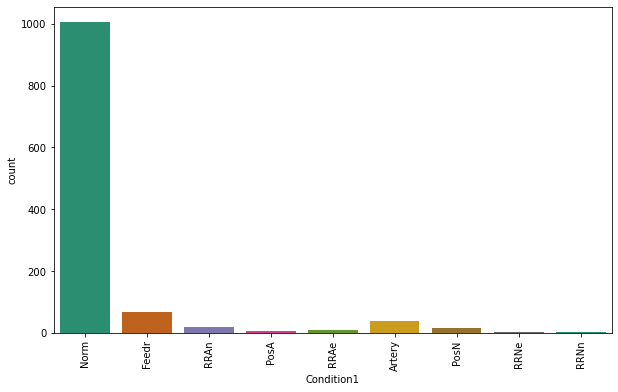

*****************************************************************************************************************************
Norm      1154
Feedr        6
PosN         2
Artery       2
RRAe         1
RRNn         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64


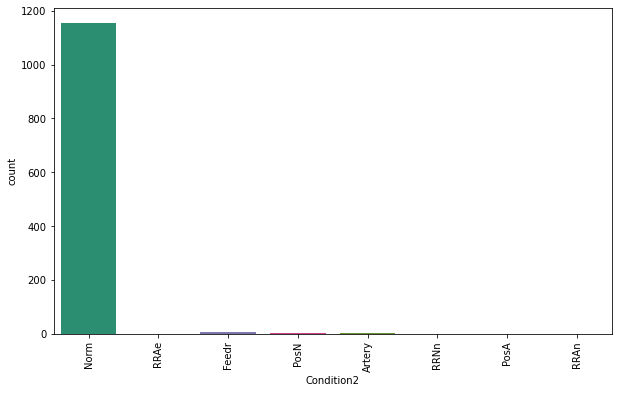

*****************************************************************************************************************************
1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64


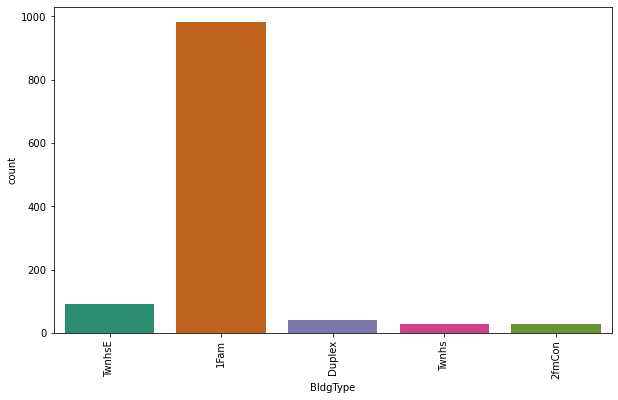

*****************************************************************************************************************************
1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64


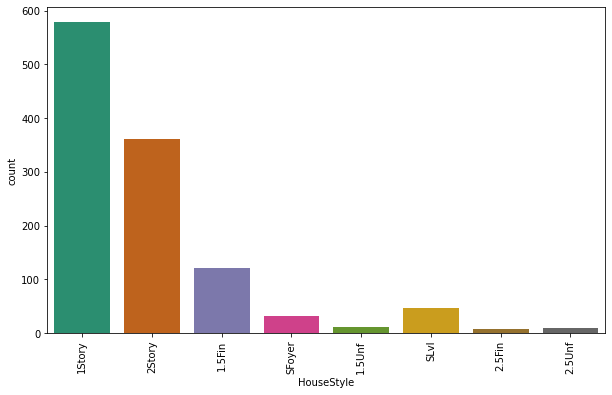

*****************************************************************************************************************************
Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64


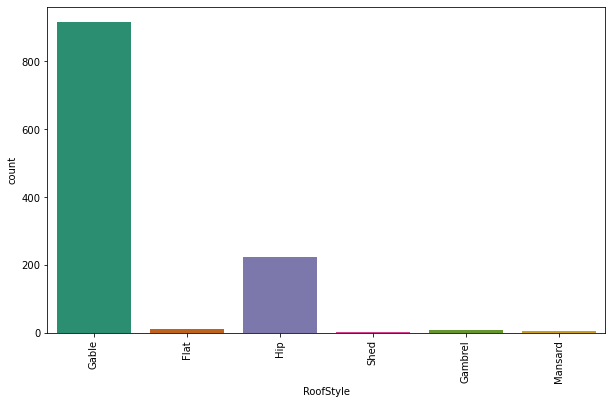

*****************************************************************************************************************************
CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Roll          1
ClyTile       1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64


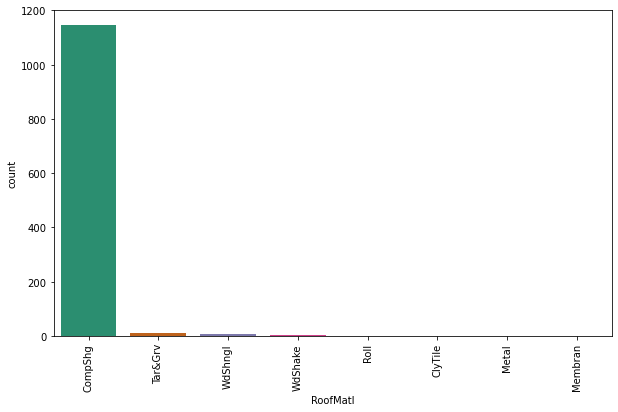

*****************************************************************************************************************************
VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
WdShing     19
AsbShng     19
Stone        2
AsphShn      1
ImStucc      1
BrkComm      1
Name: Exterior1st, dtype: int64


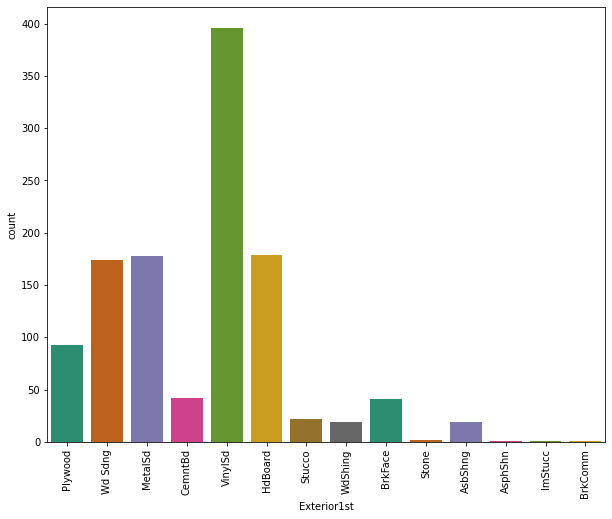

*****************************************************************************************************************************
VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: Exterior2nd, dtype: int64


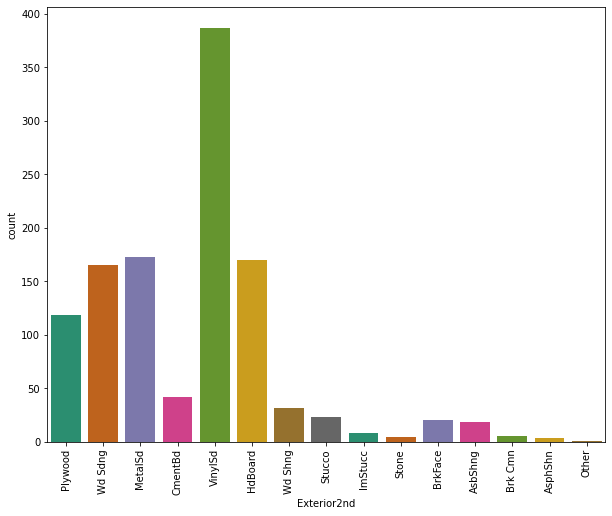

*****************************************************************************************************************************
TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64


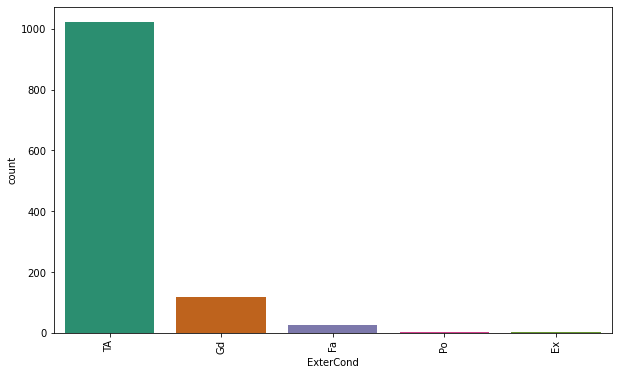

*****************************************************************************************************************************
CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64


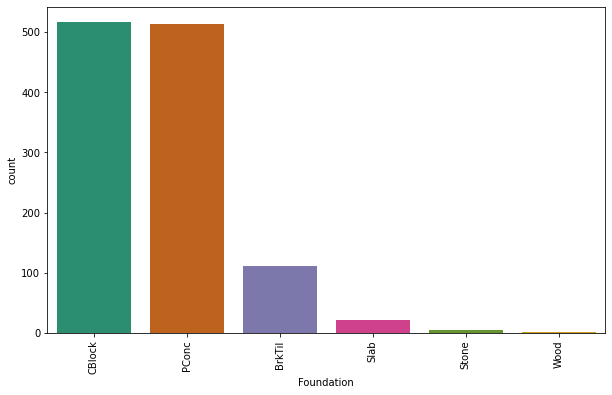

*****************************************************************************************************************************
Unf    375
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64


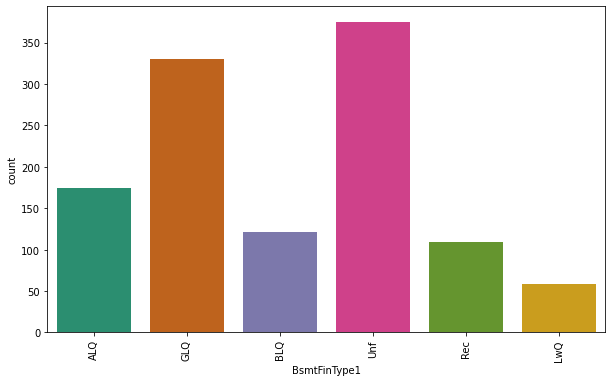

*****************************************************************************************************************************
Unf    1033
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64


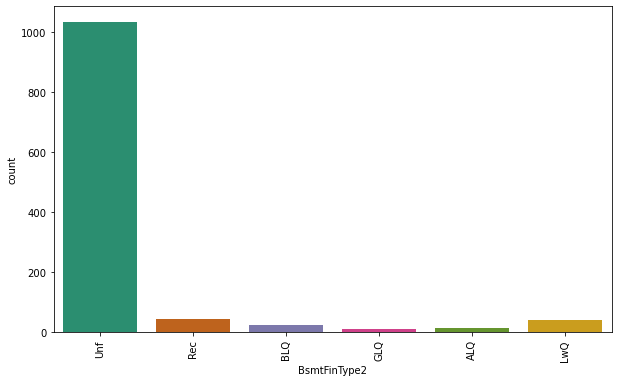

*****************************************************************************************************************************
GasA     1143
GasW       14
Grav        5
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64


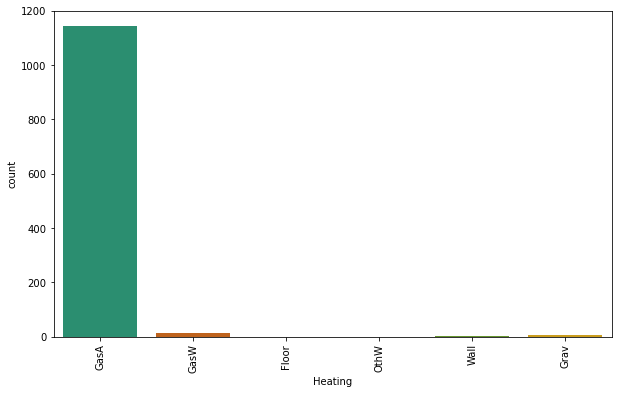

*****************************************************************************************************************************
Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64


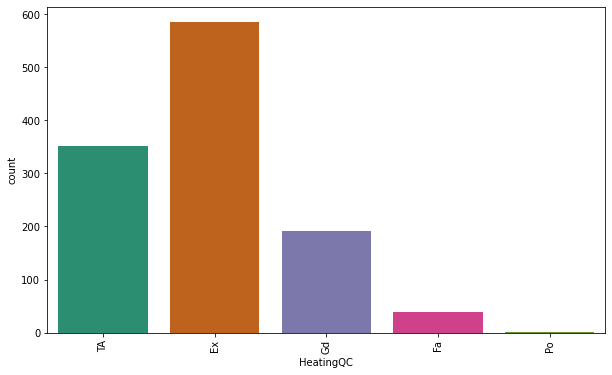

*****************************************************************************************************************************
SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64


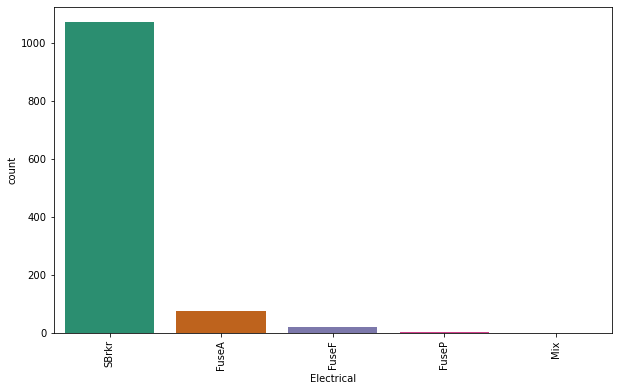

*****************************************************************************************************************************
Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64


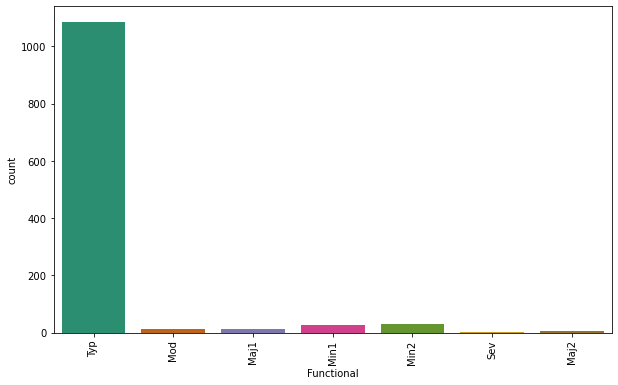

*****************************************************************************************************************************
Gd    852
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64


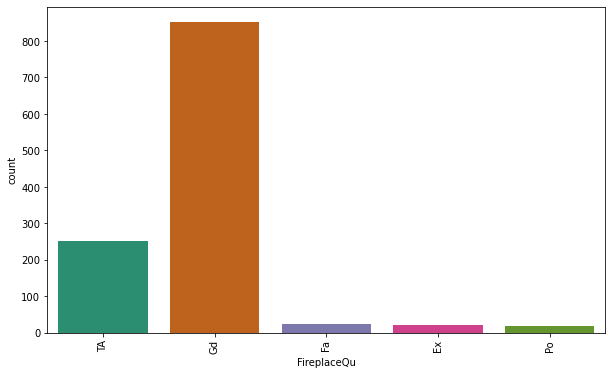

*****************************************************************************************************************************
Attchd     755
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64


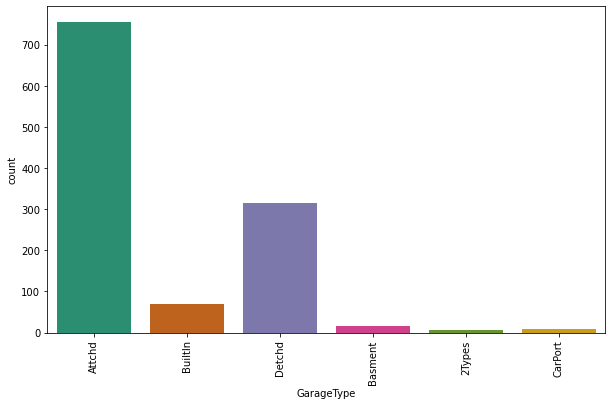

*****************************************************************************************************************************
TA    1114
Fa      39
Gd      11
Ex       2
Po       2
Name: GarageQual, dtype: int64


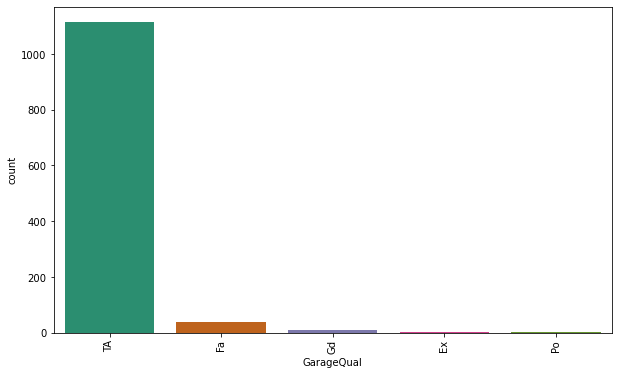

*****************************************************************************************************************************
TA    1125
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64


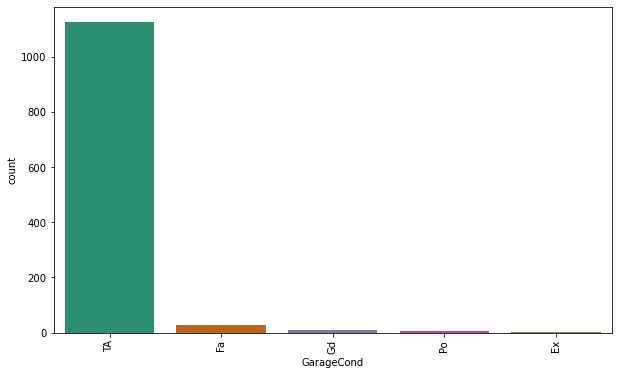

*****************************************************************************************************************************
WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
Oth        3
CWD        3
Con        2
Name: SaleType, dtype: int64


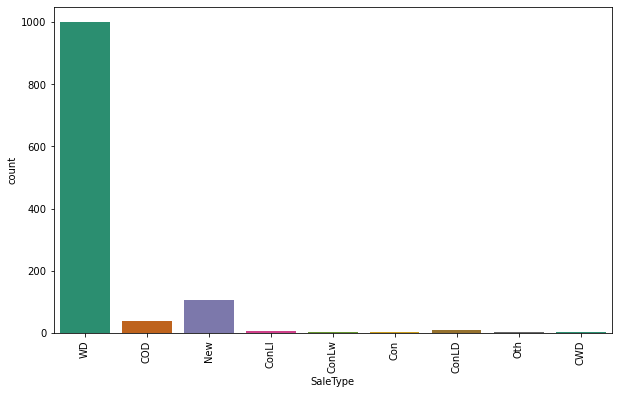

*****************************************************************************************************************************
Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64


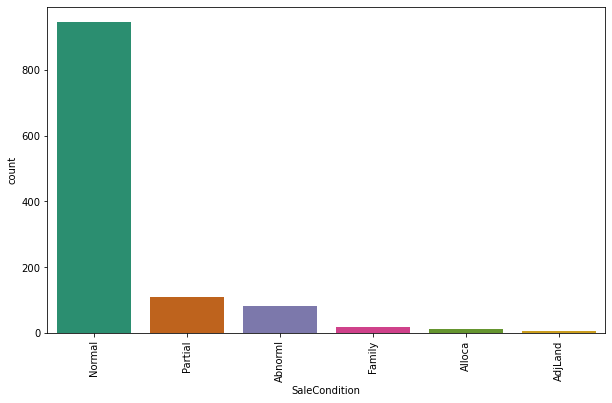

*****************************************************************************************************************************


In [49]:
df1 = train_df[['MSZoning','LotConfig',  'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',  'ExterCond', 'Foundation','BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',  'Electrical',  'Functional', 'FireplaceQu', 'GarageType',  'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition']]
for i in df1:
    print(df1[i].value_counts())
    value_count(i)

# Skewness

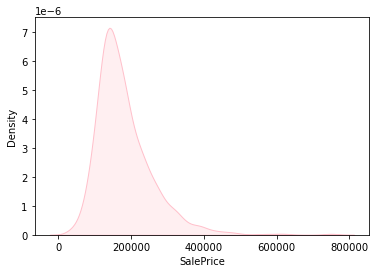

In [50]:
# Let's visualize the target variable SalePrice
plt.figure(figsize=(6,4))
sns.distplot(train_df["SalePrice"],color="pink",kde_kws={"shade": True},hist=False)
plt.show()

# The data in the target variable SalePrice is almost normally distributed. The maximum SalePrice of the house is around 200000.

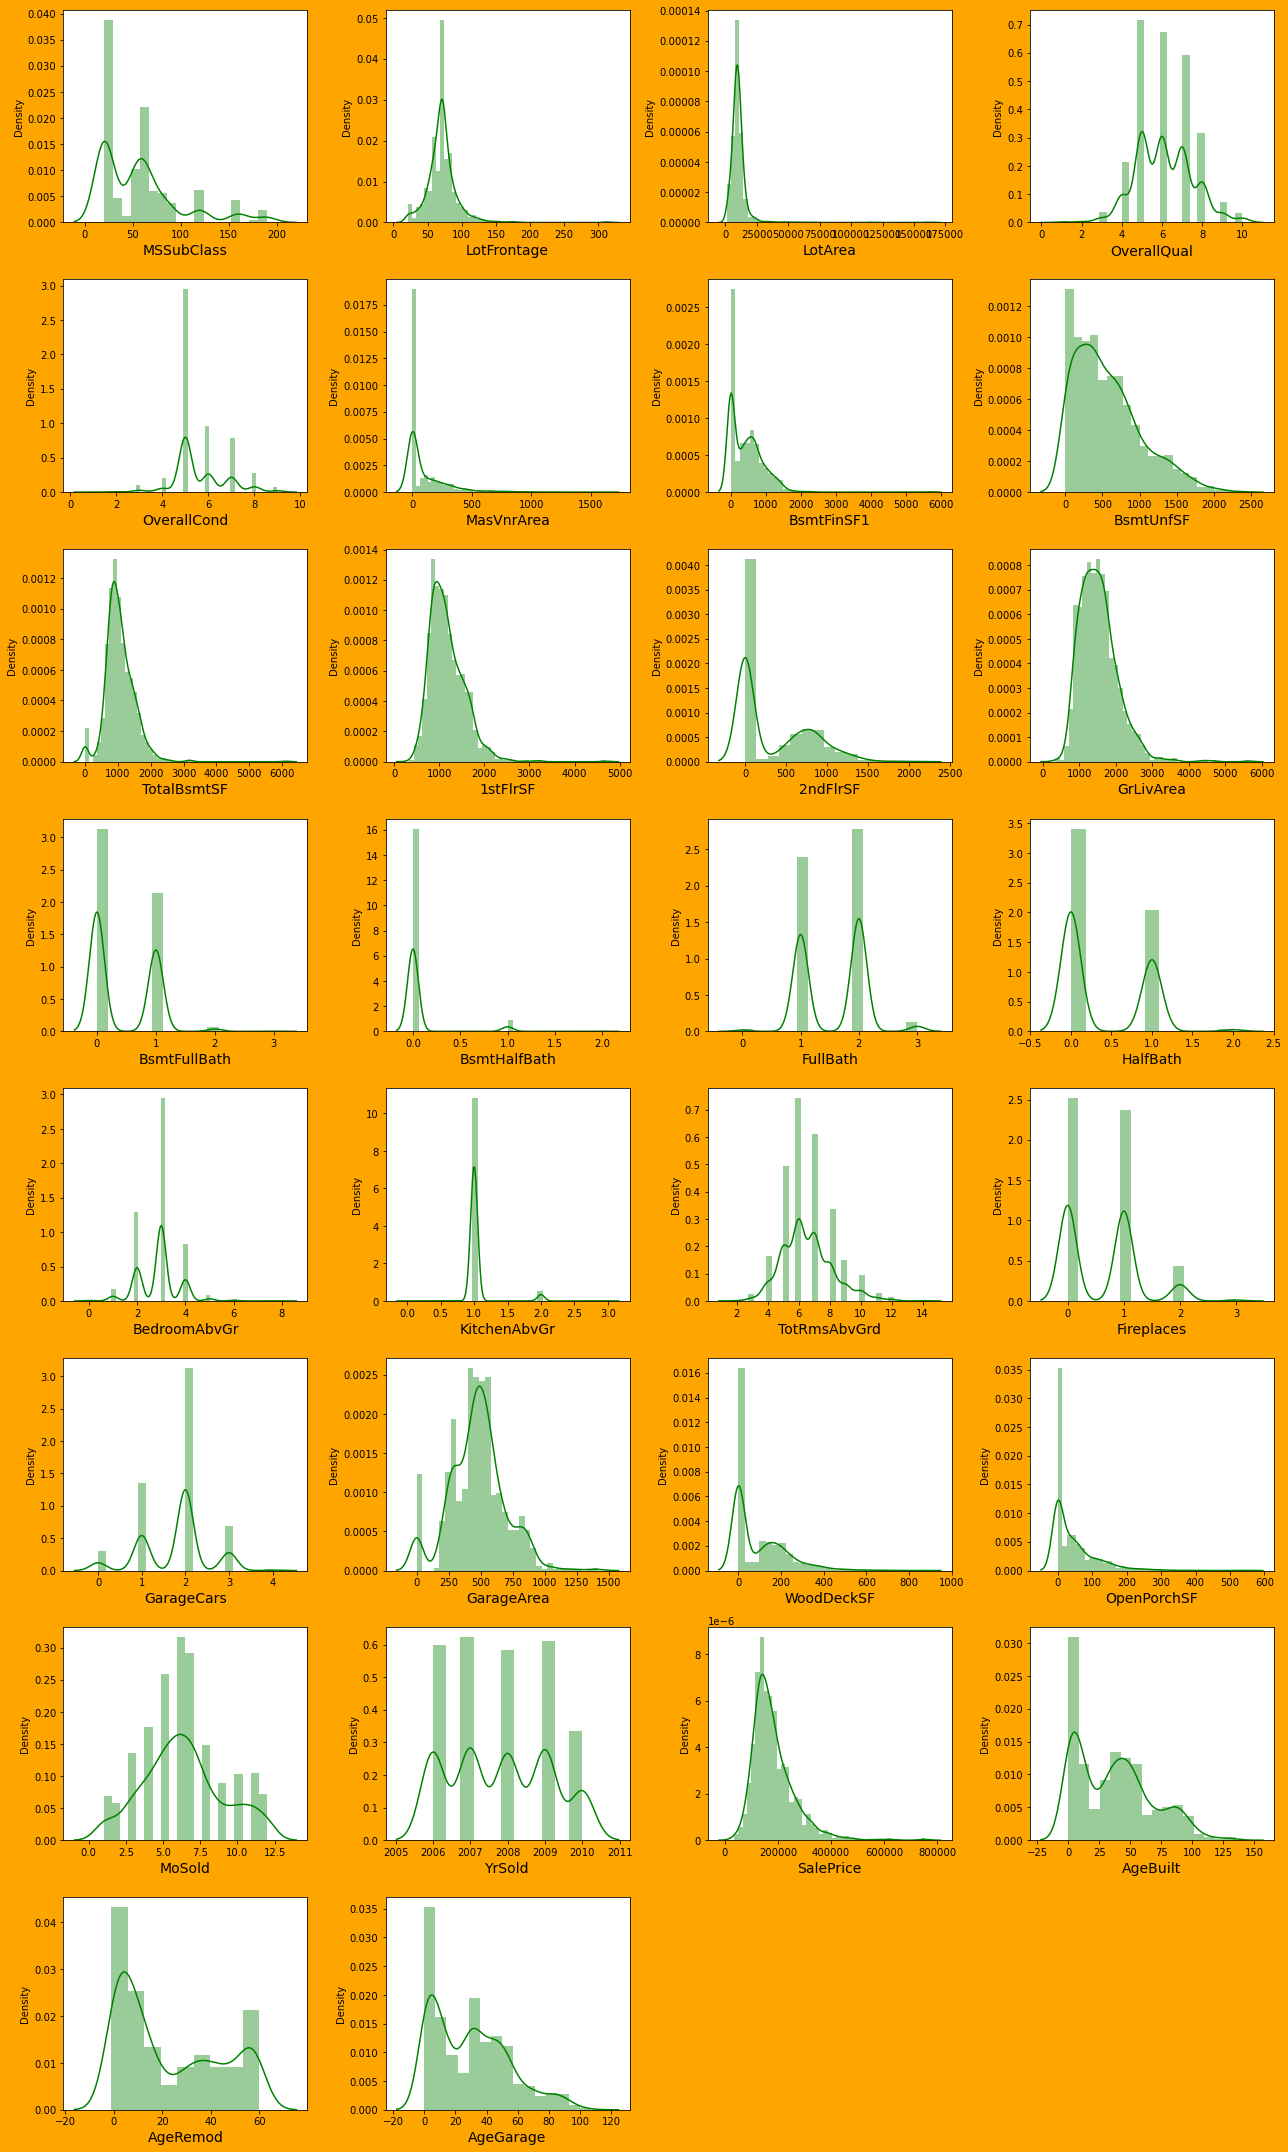

In [51]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(18,30),facecolor='orange')
plotnumber=1
for column in numerical_coltr:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.distplot(train_df[column],color="g")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

# Bivariate Analysis

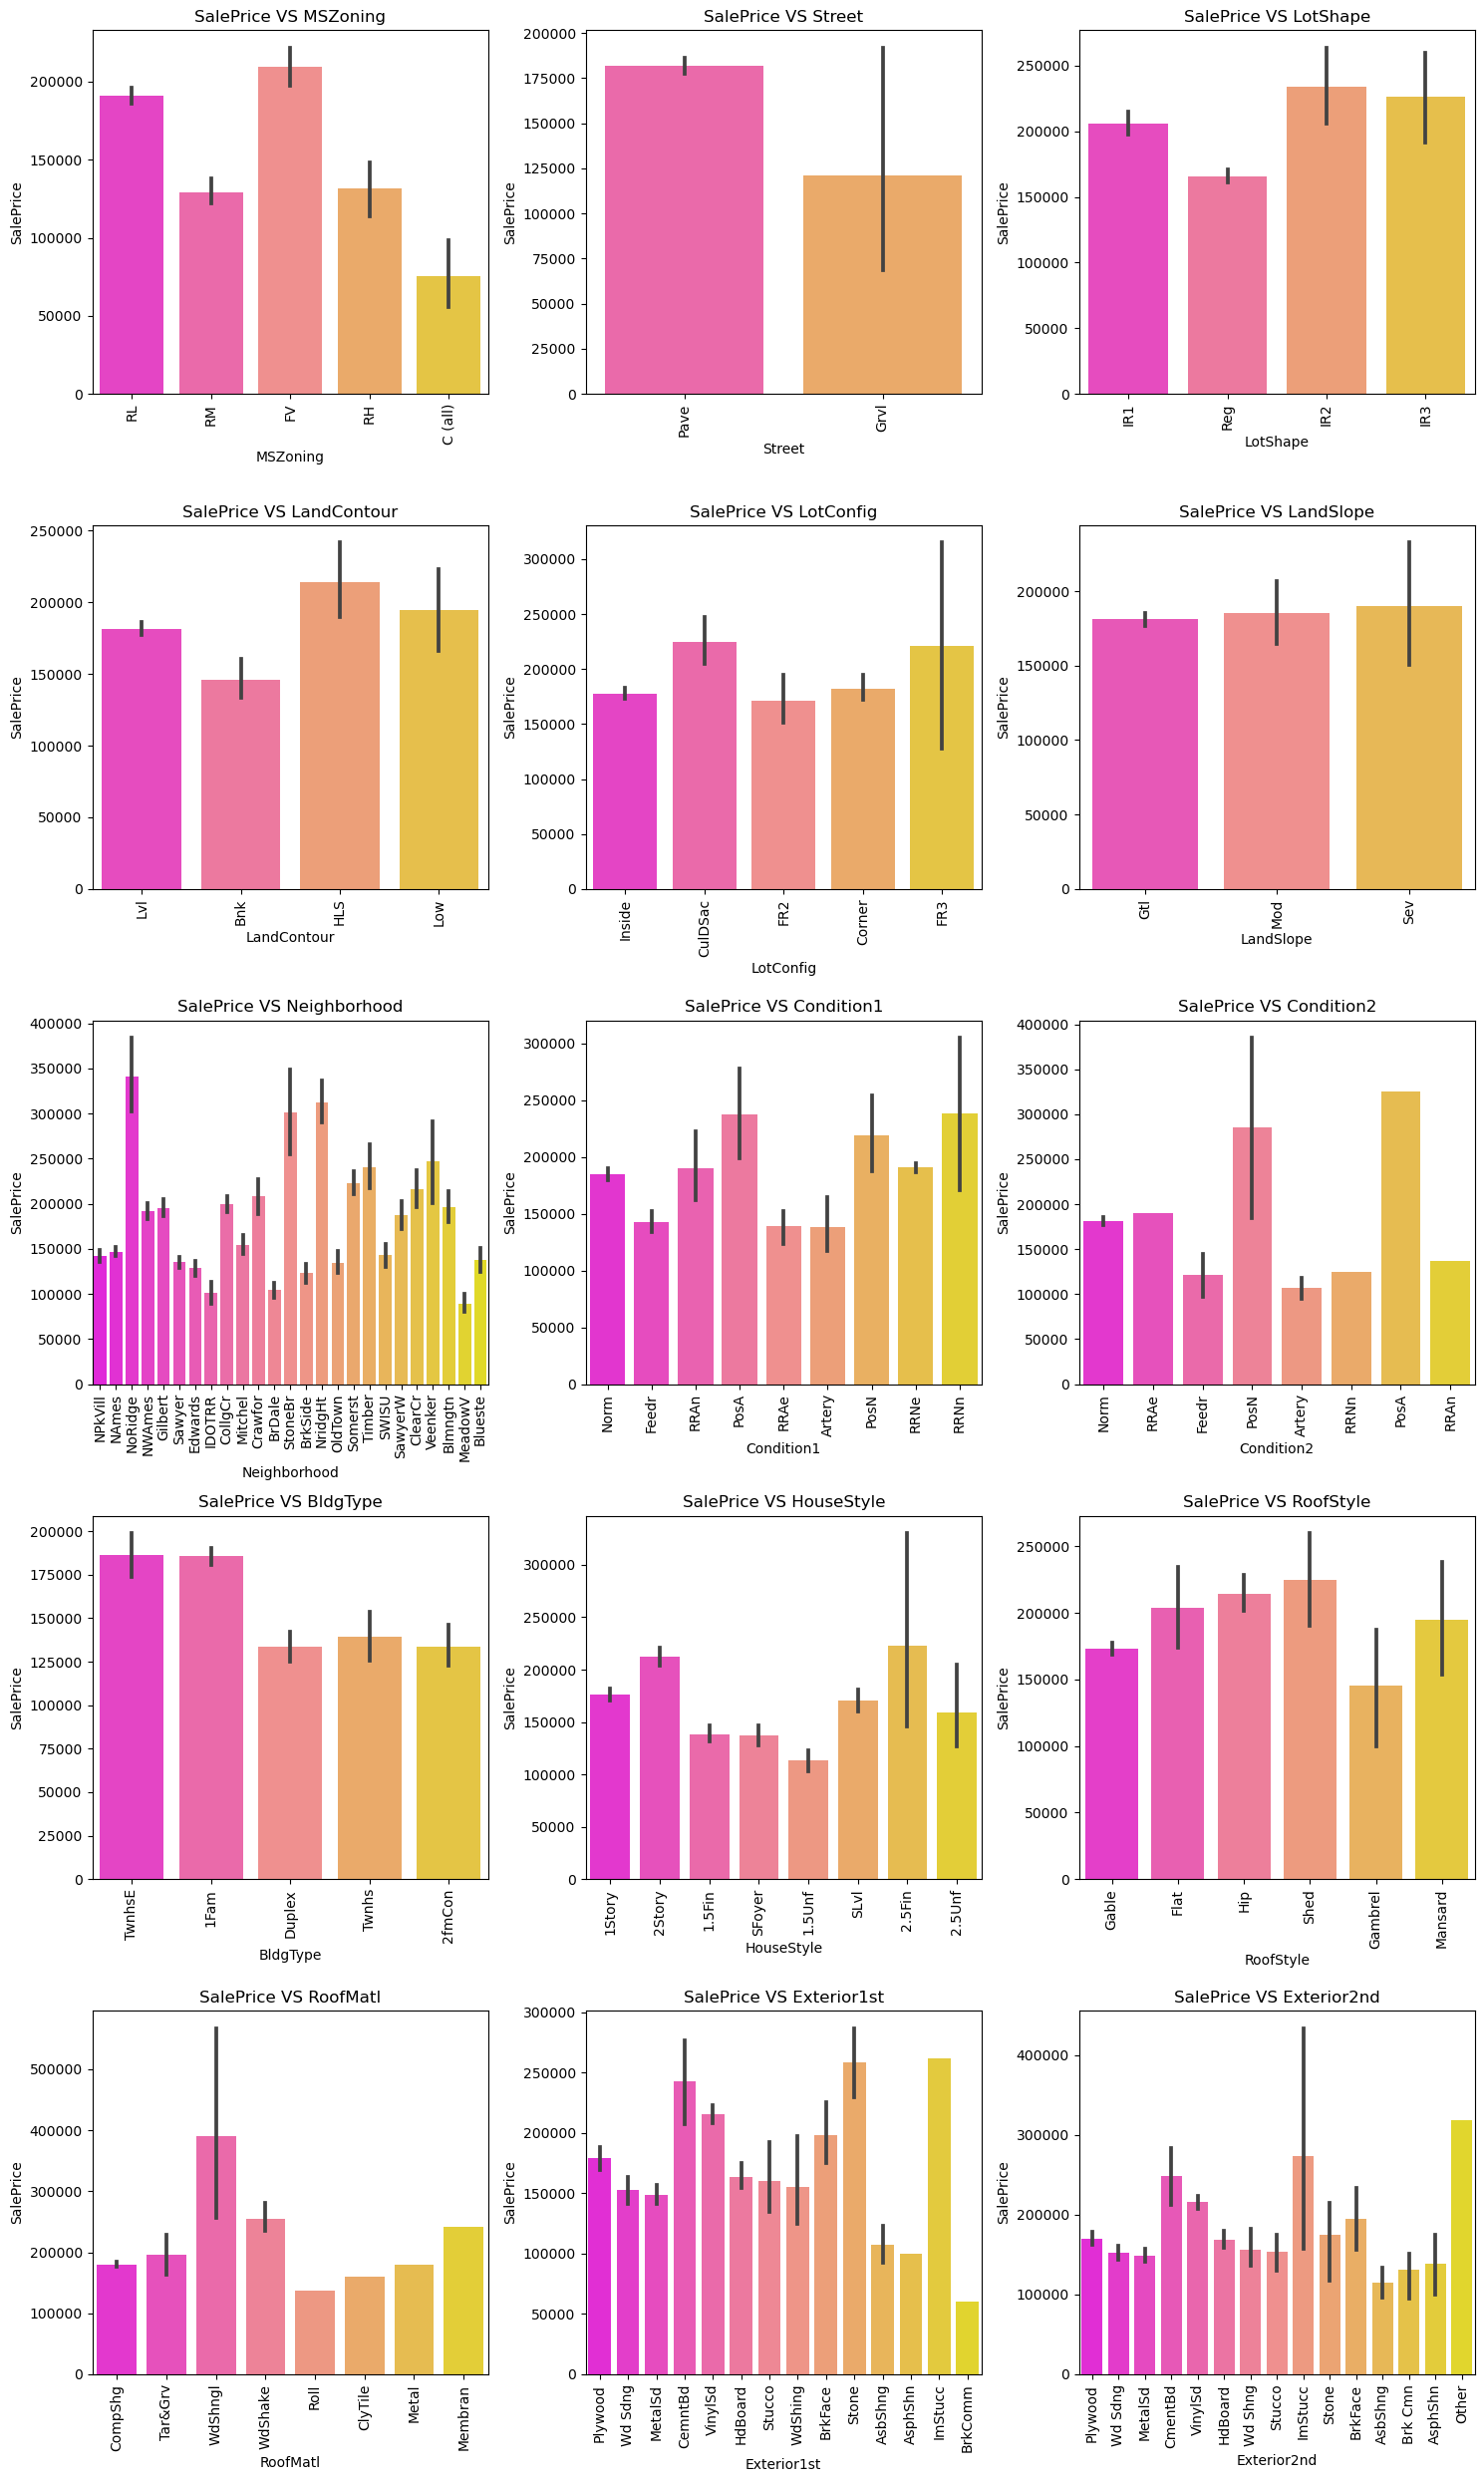

In [52]:
# Cheching relation between nominal categorical variables and target variable
nominal_data1 = ['MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd']
plt.style.use('default')
plt.figure(figsize=(15,25))
for i in range(len(nominal_data1)):
    plt.subplot(5,3,i+1)
    sns.barplot(y=train_df['SalePrice'],x=train_df[nominal_data1[i]],palette="spring")
    plt.title(f"SalePrice VS {nominal_data1[i]}",fontsize=12)
    plt.xticks(rotation = 90)  
    plt.tight_layout()

# Ordinal and sales variable

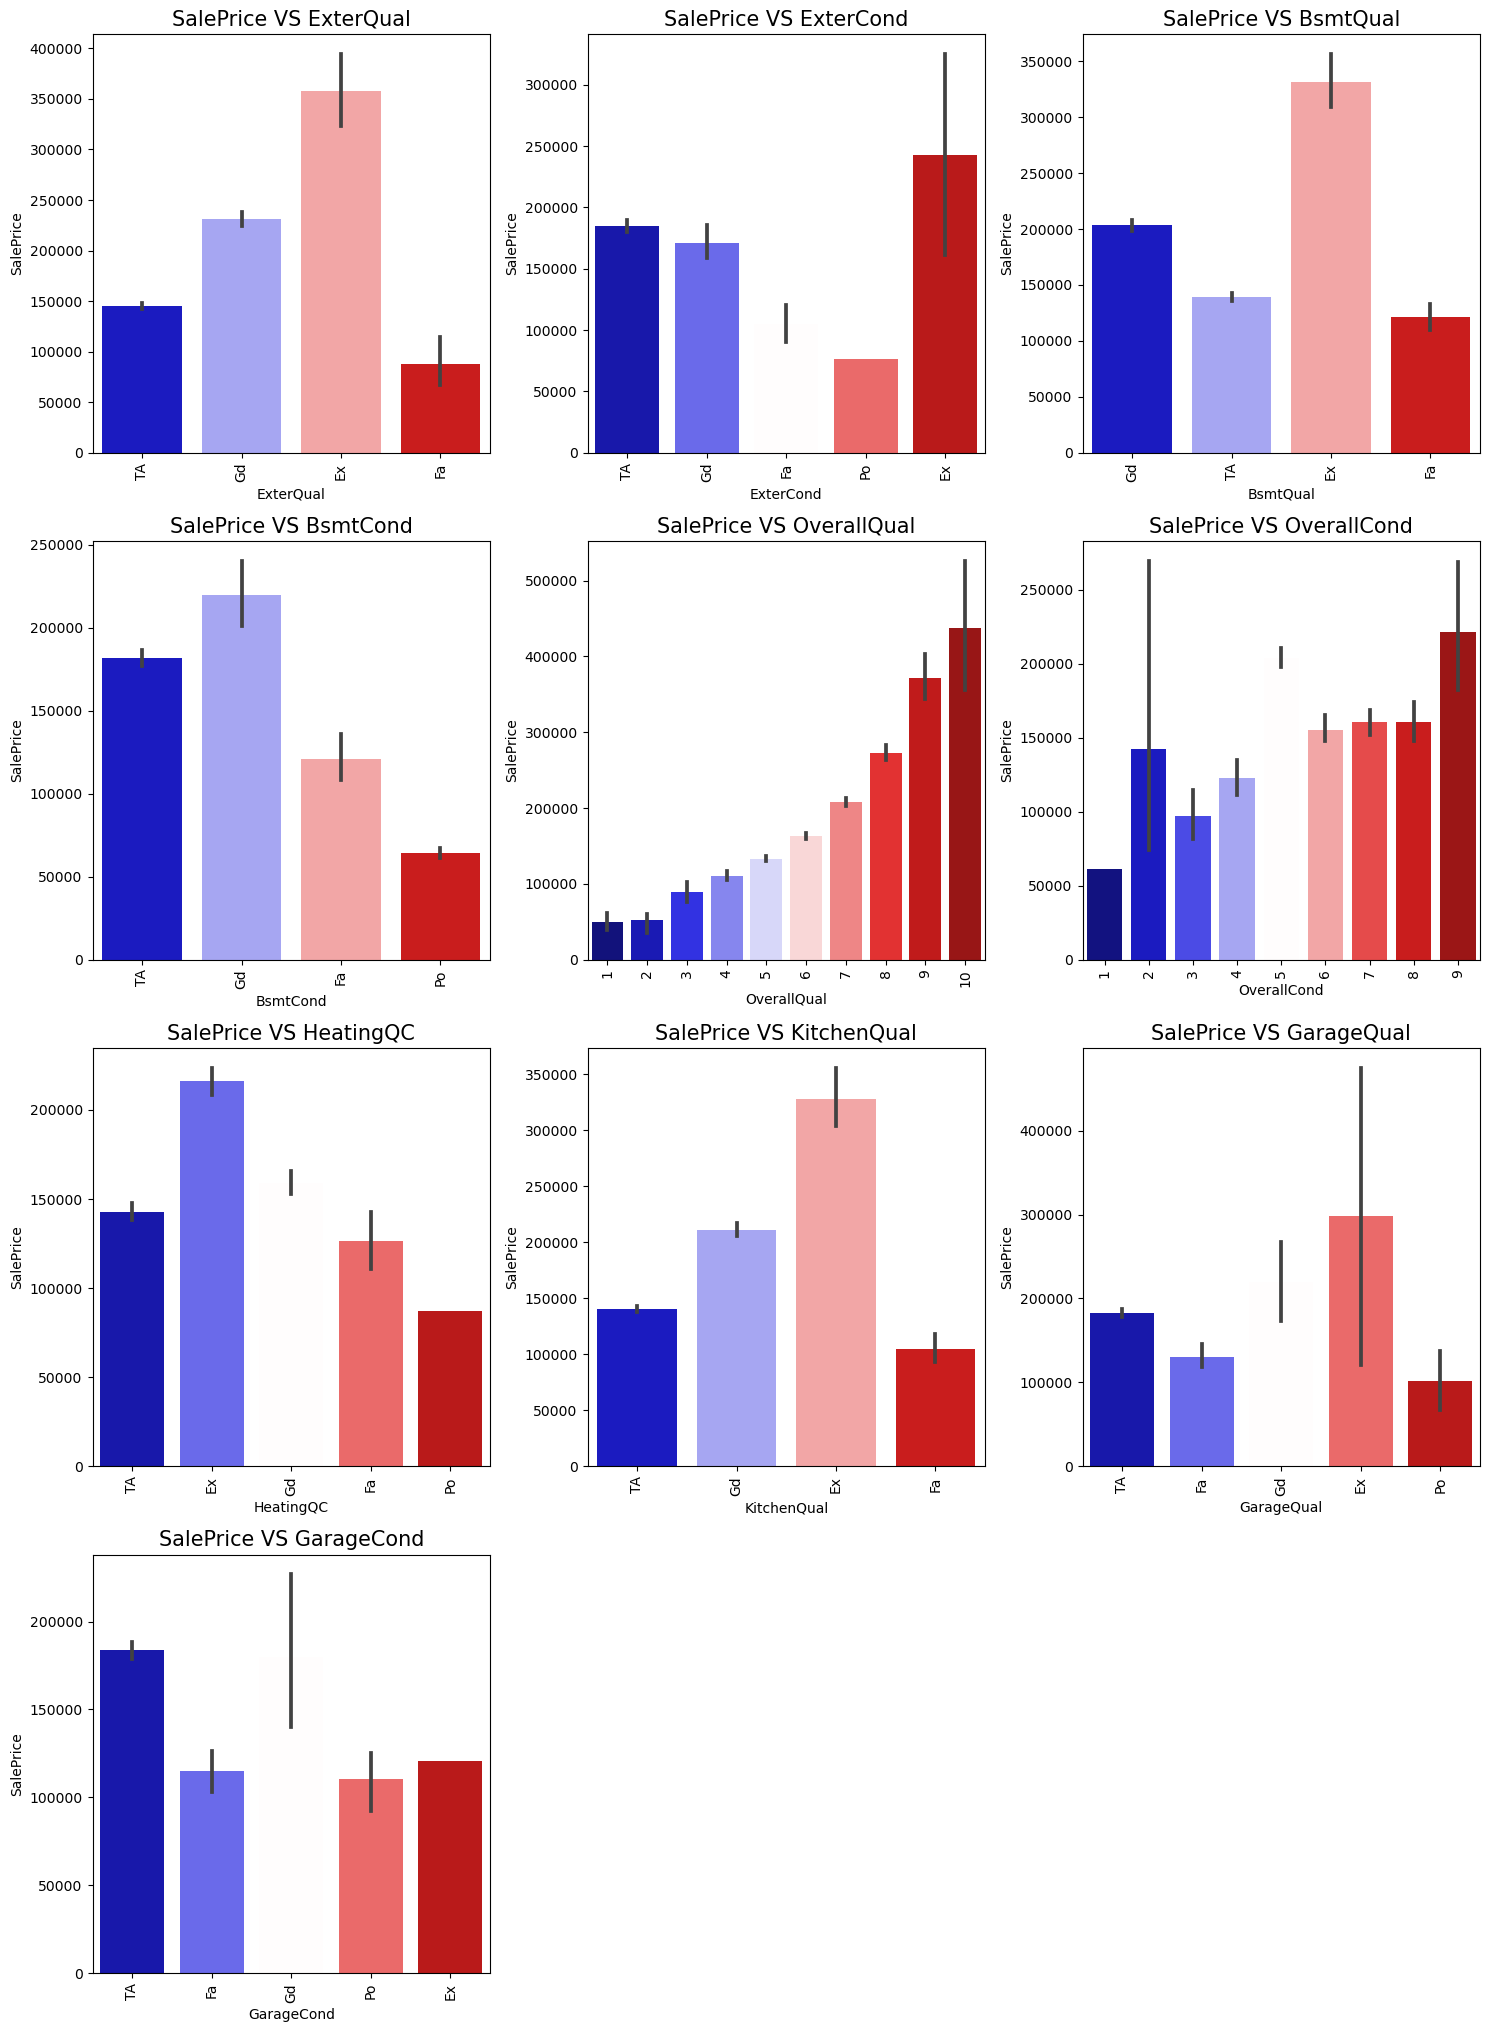

In [53]:
# Cheching relation between ordinal categorical variables and target variable
ordinal_data = ['ExterQual','ExterCond','BsmtQual','BsmtCond','OverallQual','OverallCond','HeatingQC','KitchenQual','GarageQual','GarageCond']
plt.style.use('default')
plt.figure(figsize=(15,25))
for i in range(len(ordinal_data)):
    plt.subplot(5,3,i+1)
    sns.barplot(y=train_df['SalePrice'],x=train_df[ordinal_data[i]],palette="seismic")
    plt.title(f"SalePrice VS {ordinal_data[i]}",fontsize=15)
    plt.xticks(rotation = 90)  
    plt.tight_layout()

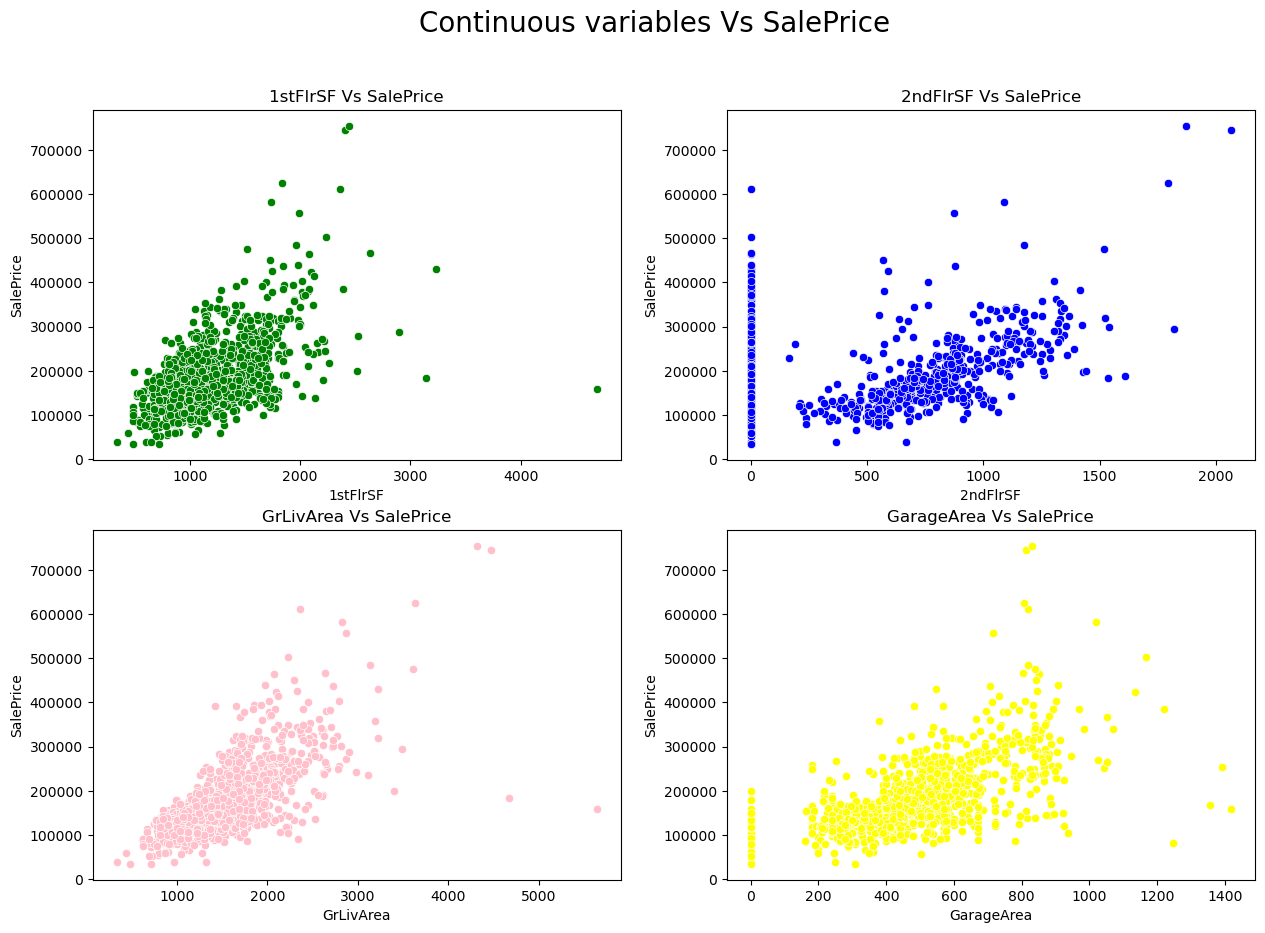

In [54]:
plt.figure(figsize=(15,10))
plt.suptitle('Continuous variables Vs SalePrice',fontsize=20)

plt.subplot(2,2,1)
plt.title('1stFlrSF Vs SalePrice')
sns.scatterplot(x='1stFlrSF',y='SalePrice',data=train_df,color='g')

plt.subplot(2,2,2)
plt.title('2ndFlrSF Vs SalePrice')
sns.scatterplot(x='2ndFlrSF',y='SalePrice',data=train_df,color='b')

plt.subplot(2,2,3)
plt.title('GrLivArea Vs SalePrice')
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train_df,color='pink')

plt.subplot(2,2,4)
plt.title('GarageArea Vs SalePrice')
sns.scatterplot(x='GarageArea',y='SalePrice',data=train_df,color="yellow")
plt.show()

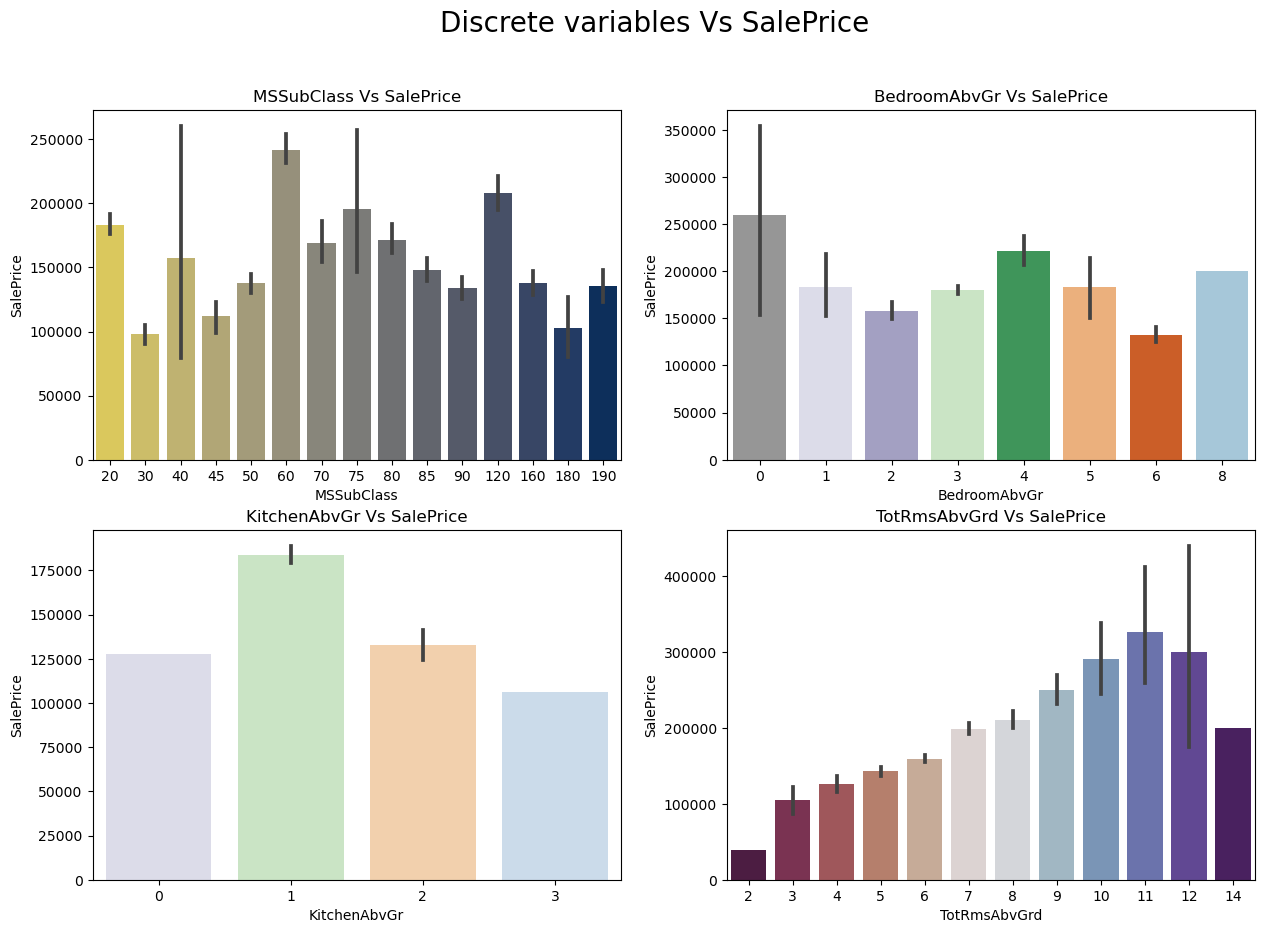

In [55]:
plt.style.use('default')
plt.figure(figsize=(15,10))
plt.suptitle('Discrete variables Vs SalePrice',fontsize=20)

plt.subplot(2,2,1)
plt.title('MSSubClass Vs SalePrice')
sns.barplot(x='MSSubClass',y='SalePrice',data=train_df,palette="cividis_r")

plt.subplot(2,2,2)
plt.title('BedroomAbvGr Vs SalePrice')
sns.barplot(x='BedroomAbvGr',y='SalePrice',data=train_df,palette='tab20c_r')

plt.subplot(2,2,3)
plt.title('KitchenAbvGr Vs SalePrice')
sns.barplot(x='KitchenAbvGr',y='SalePrice',data=train_df,palette="tab20c_r")

plt.subplot(2,2,4)
plt.title('TotRmsAbvGrd Vs SalePrice')
sns.barplot(x='TotRmsAbvGrd',y='SalePrice',data=train_df,palette='twilight_shifted_r')
plt.show()

# Checking Outliers from the dataset

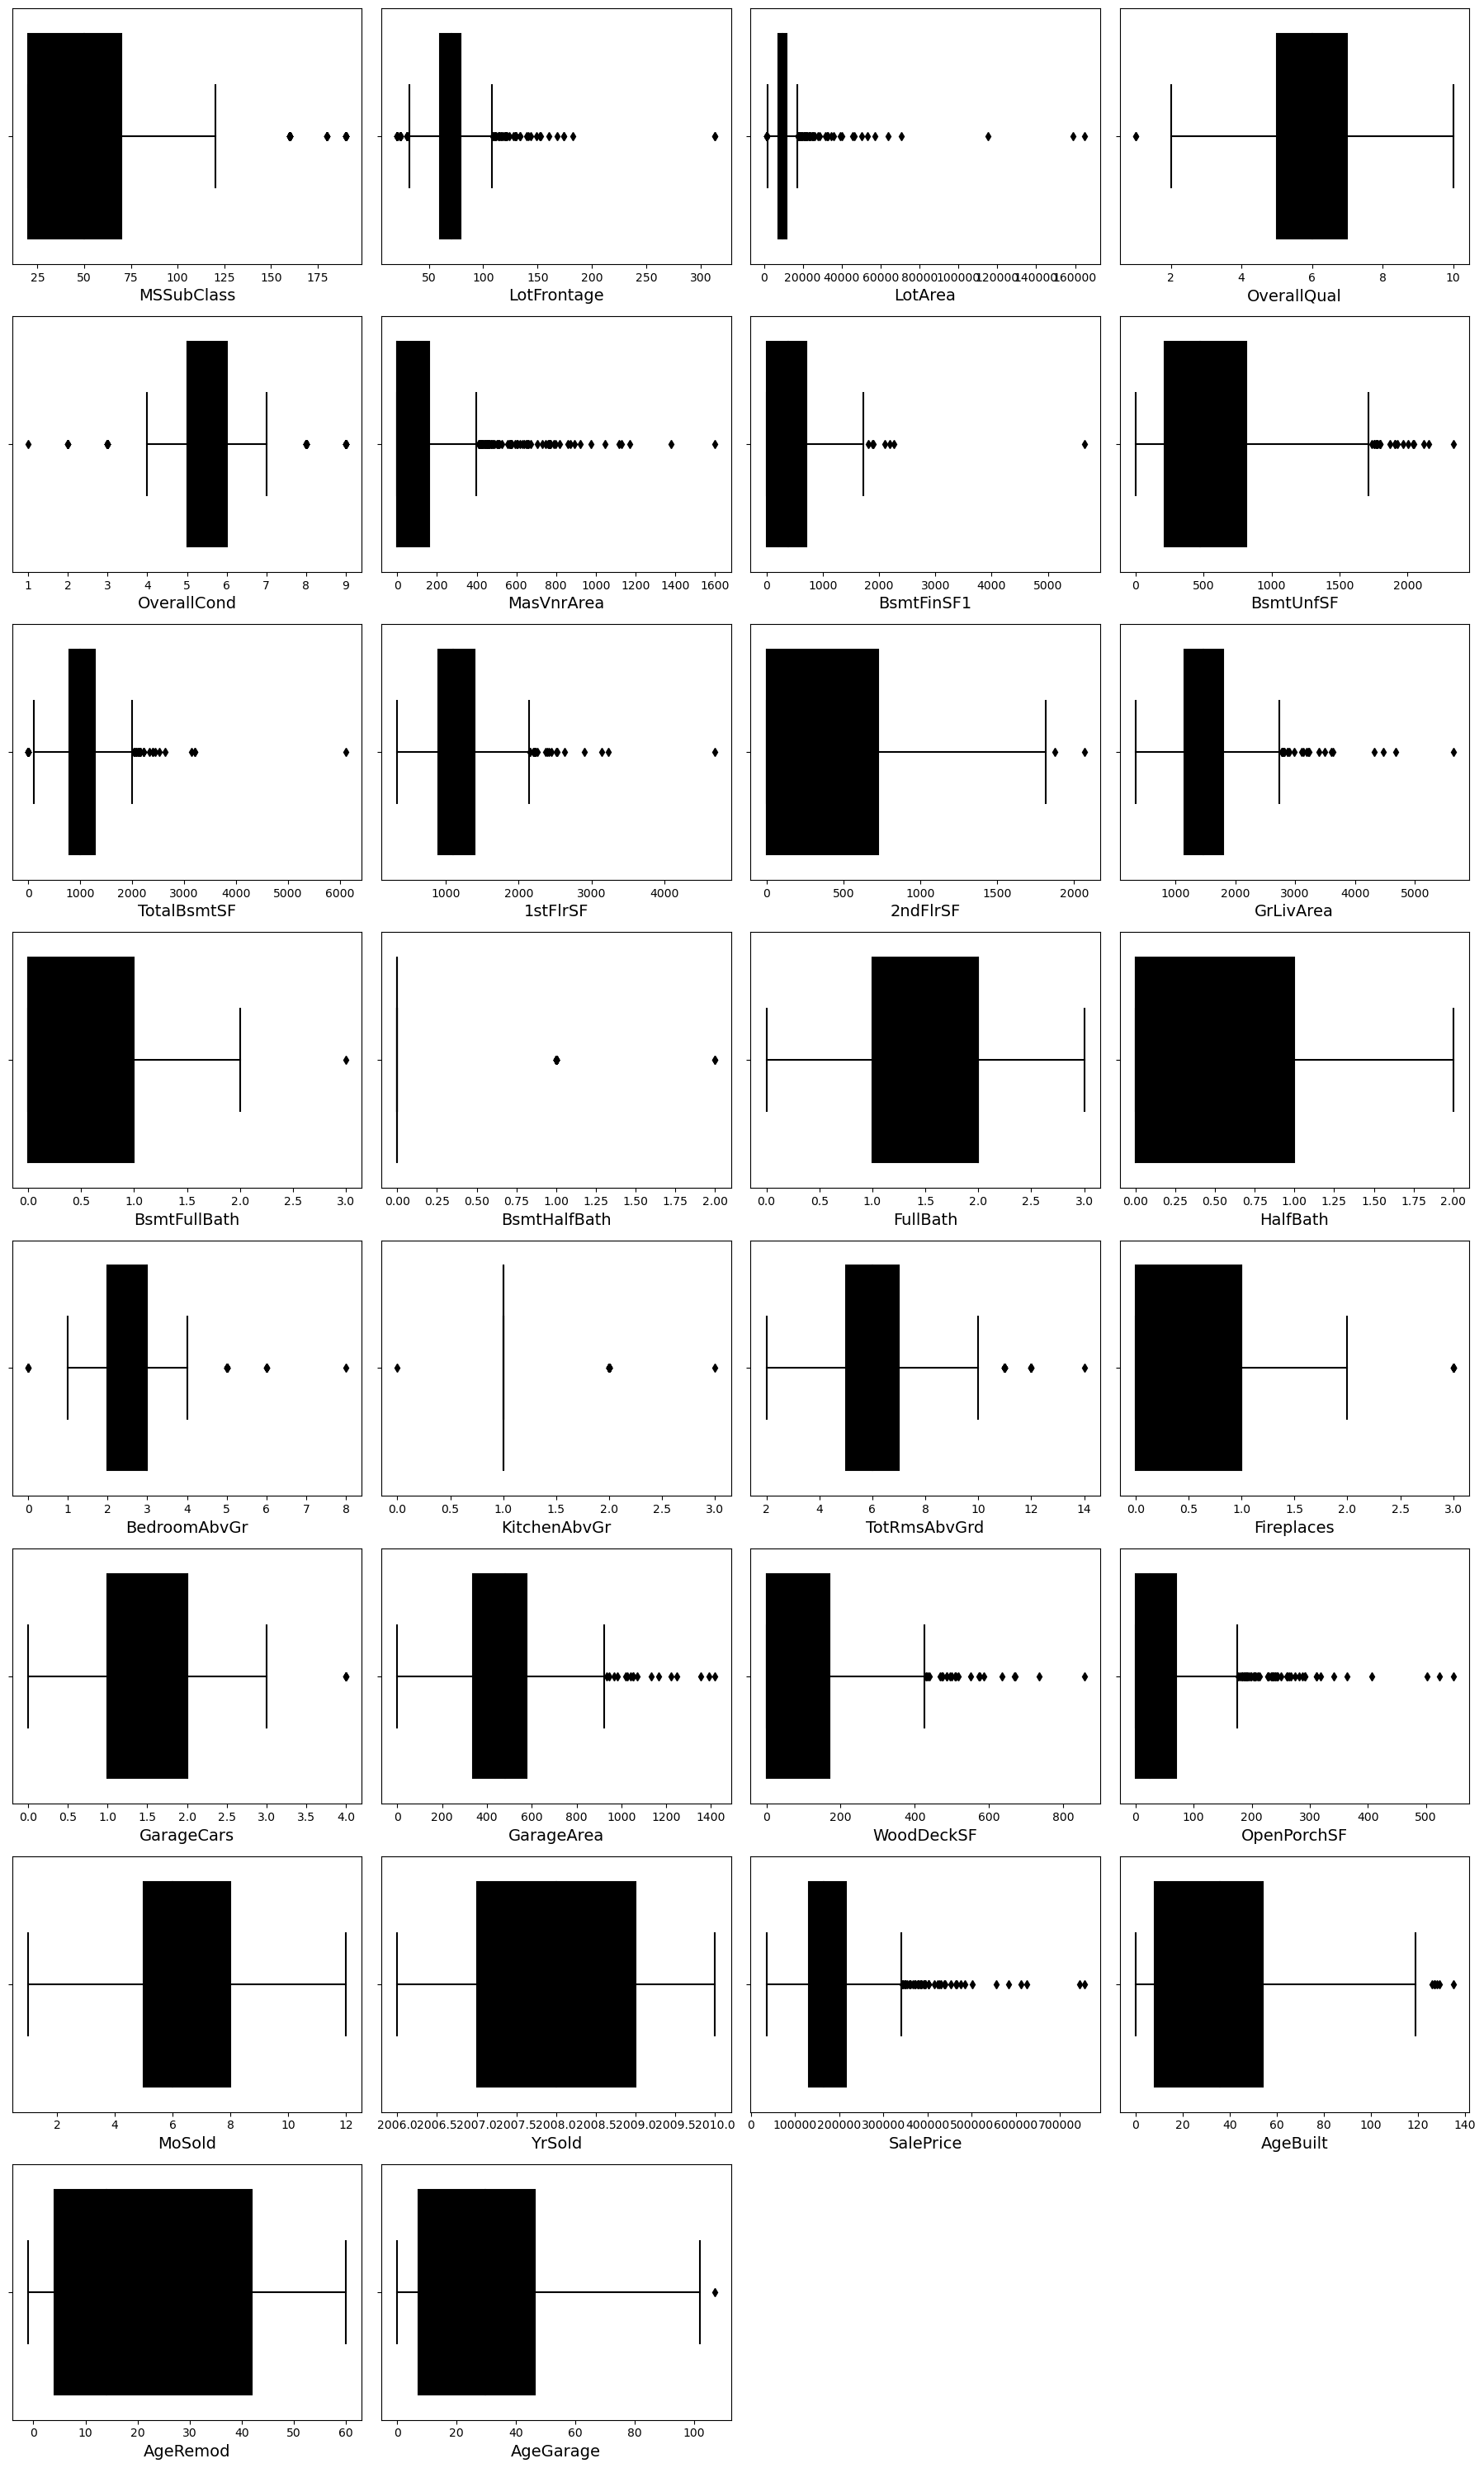

In [56]:
# Identifying the outliers using boxplot
plt.figure(figsize=(18,30),facecolor='white')
plotnumber=1
for column in numerical_coltr:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(train_df[column],color="black")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

# Removing outliers in train dataset

# Zscore method

In [57]:
# Feature containing outliers
features_tr = train_df[['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'AgeBuilt', 'AgeGarage']]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features_tr))

In [58]:
# Creating new dataframe
new_train_df = train_df[(z<3).all(axis=1)] 
new_train_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL     70.98847     4928   Pave      IR1         Lvl   
1          20       RL     95.00000    15865   Pave      IR1         Lvl   
2          60       RL     92.00000     9920   Pave      IR1         Lvl   
3          20       RL    105.00000    11751   Pave      IR1         Lvl   
5          60       RL     58.00000    14054   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood  ... WoodDeckSF OpenPorchSF MoSold YrSold  \
0    Inside       Gtl      NPkVill  ...          0         205      2   2007   
1    Inside       Mod        NAmes  ...         81         207     10   2007   
2   CulDSac       Gtl      NoRidge  ...        180         130      6   2007   
3    Inside       Gtl       NWAmes  ...          0         122      1   2010   
5    Inside       Gtl      Gilbert  ...        100          17     11   2006   

   SaleType  SaleCondition SalePrice AgeBuilt AgeRemod AgeGarage  
0        WD         Normal    128000       31       31      30.0  
1        WD         Normal    268000       37       37      37.0  
2        WD         Normal    269790       11       10      10.0  
3       COD         Normal    190000       33       33      33.0  
5       New        Partial    219210        0        0       0.0  

[5 rows x 68 columns]

This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

In [59]:
# Checking the shape of dataset before and after removing outliers
print("Shape of train dataset before removing outliers:", train_df.shape)
print("Shape of train dataset after removing outliers:", new_train_df.shape)

Shape of train dataset before removing outliers: (1168, 68)
Shape of train dataset after removing outliers: (947, 68)


In [61]:
# Checking the the data loss after removing outliers
data_loss = (1168-947)/1168*100
data_loss

18.92123287671233

# By using Zscore I am losing around 19% of data which is not acceptable. The acceptable range of data loss is less than 10. So let's try to remove outliers using IQR method.

# IQR (Inter Quantile Range) method

In [63]:
# 1st quantile
Q1=features_tr.quantile(0.25)

# 3rd quantile
Q3=features_tr.quantile(0.75)

# IQR
IQR=Q3 - Q1

train_df1=train_df[~((train_df < (Q1 - 1.5 * IQR)) |(train_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [64]:
print("Shape of train data after using IQR method:", train_df1.shape)

Shape of train data after using IQR method: (756, 68)


In [65]:
# Checking the the data loss after removing outliers
data_loss = (1168-756)/1168*100
data_loss

35.273972602739725

# By using Zscore and IQR method I am losing large amount of data, let's use percentile method to remove the outliers by setting the dataloss to 2%.

In [66]:
# Removing outliers in train data using percentile method 
for col in features_tr:
    if train_df[col].dtypes != 'object':
        percentile = train_df[col].quantile([0.01,0.98]).values
        train_df[col][train_df[col]<=percentile[0]]=percentile[0]
        train_df[col][train_df[col]>=percentile[1]]=percentile[1]

# I have removed the outliers present in train dataset using percentile method.

Let's perform the same thing for test dataset also.

# Identifying the outliers in test dataset

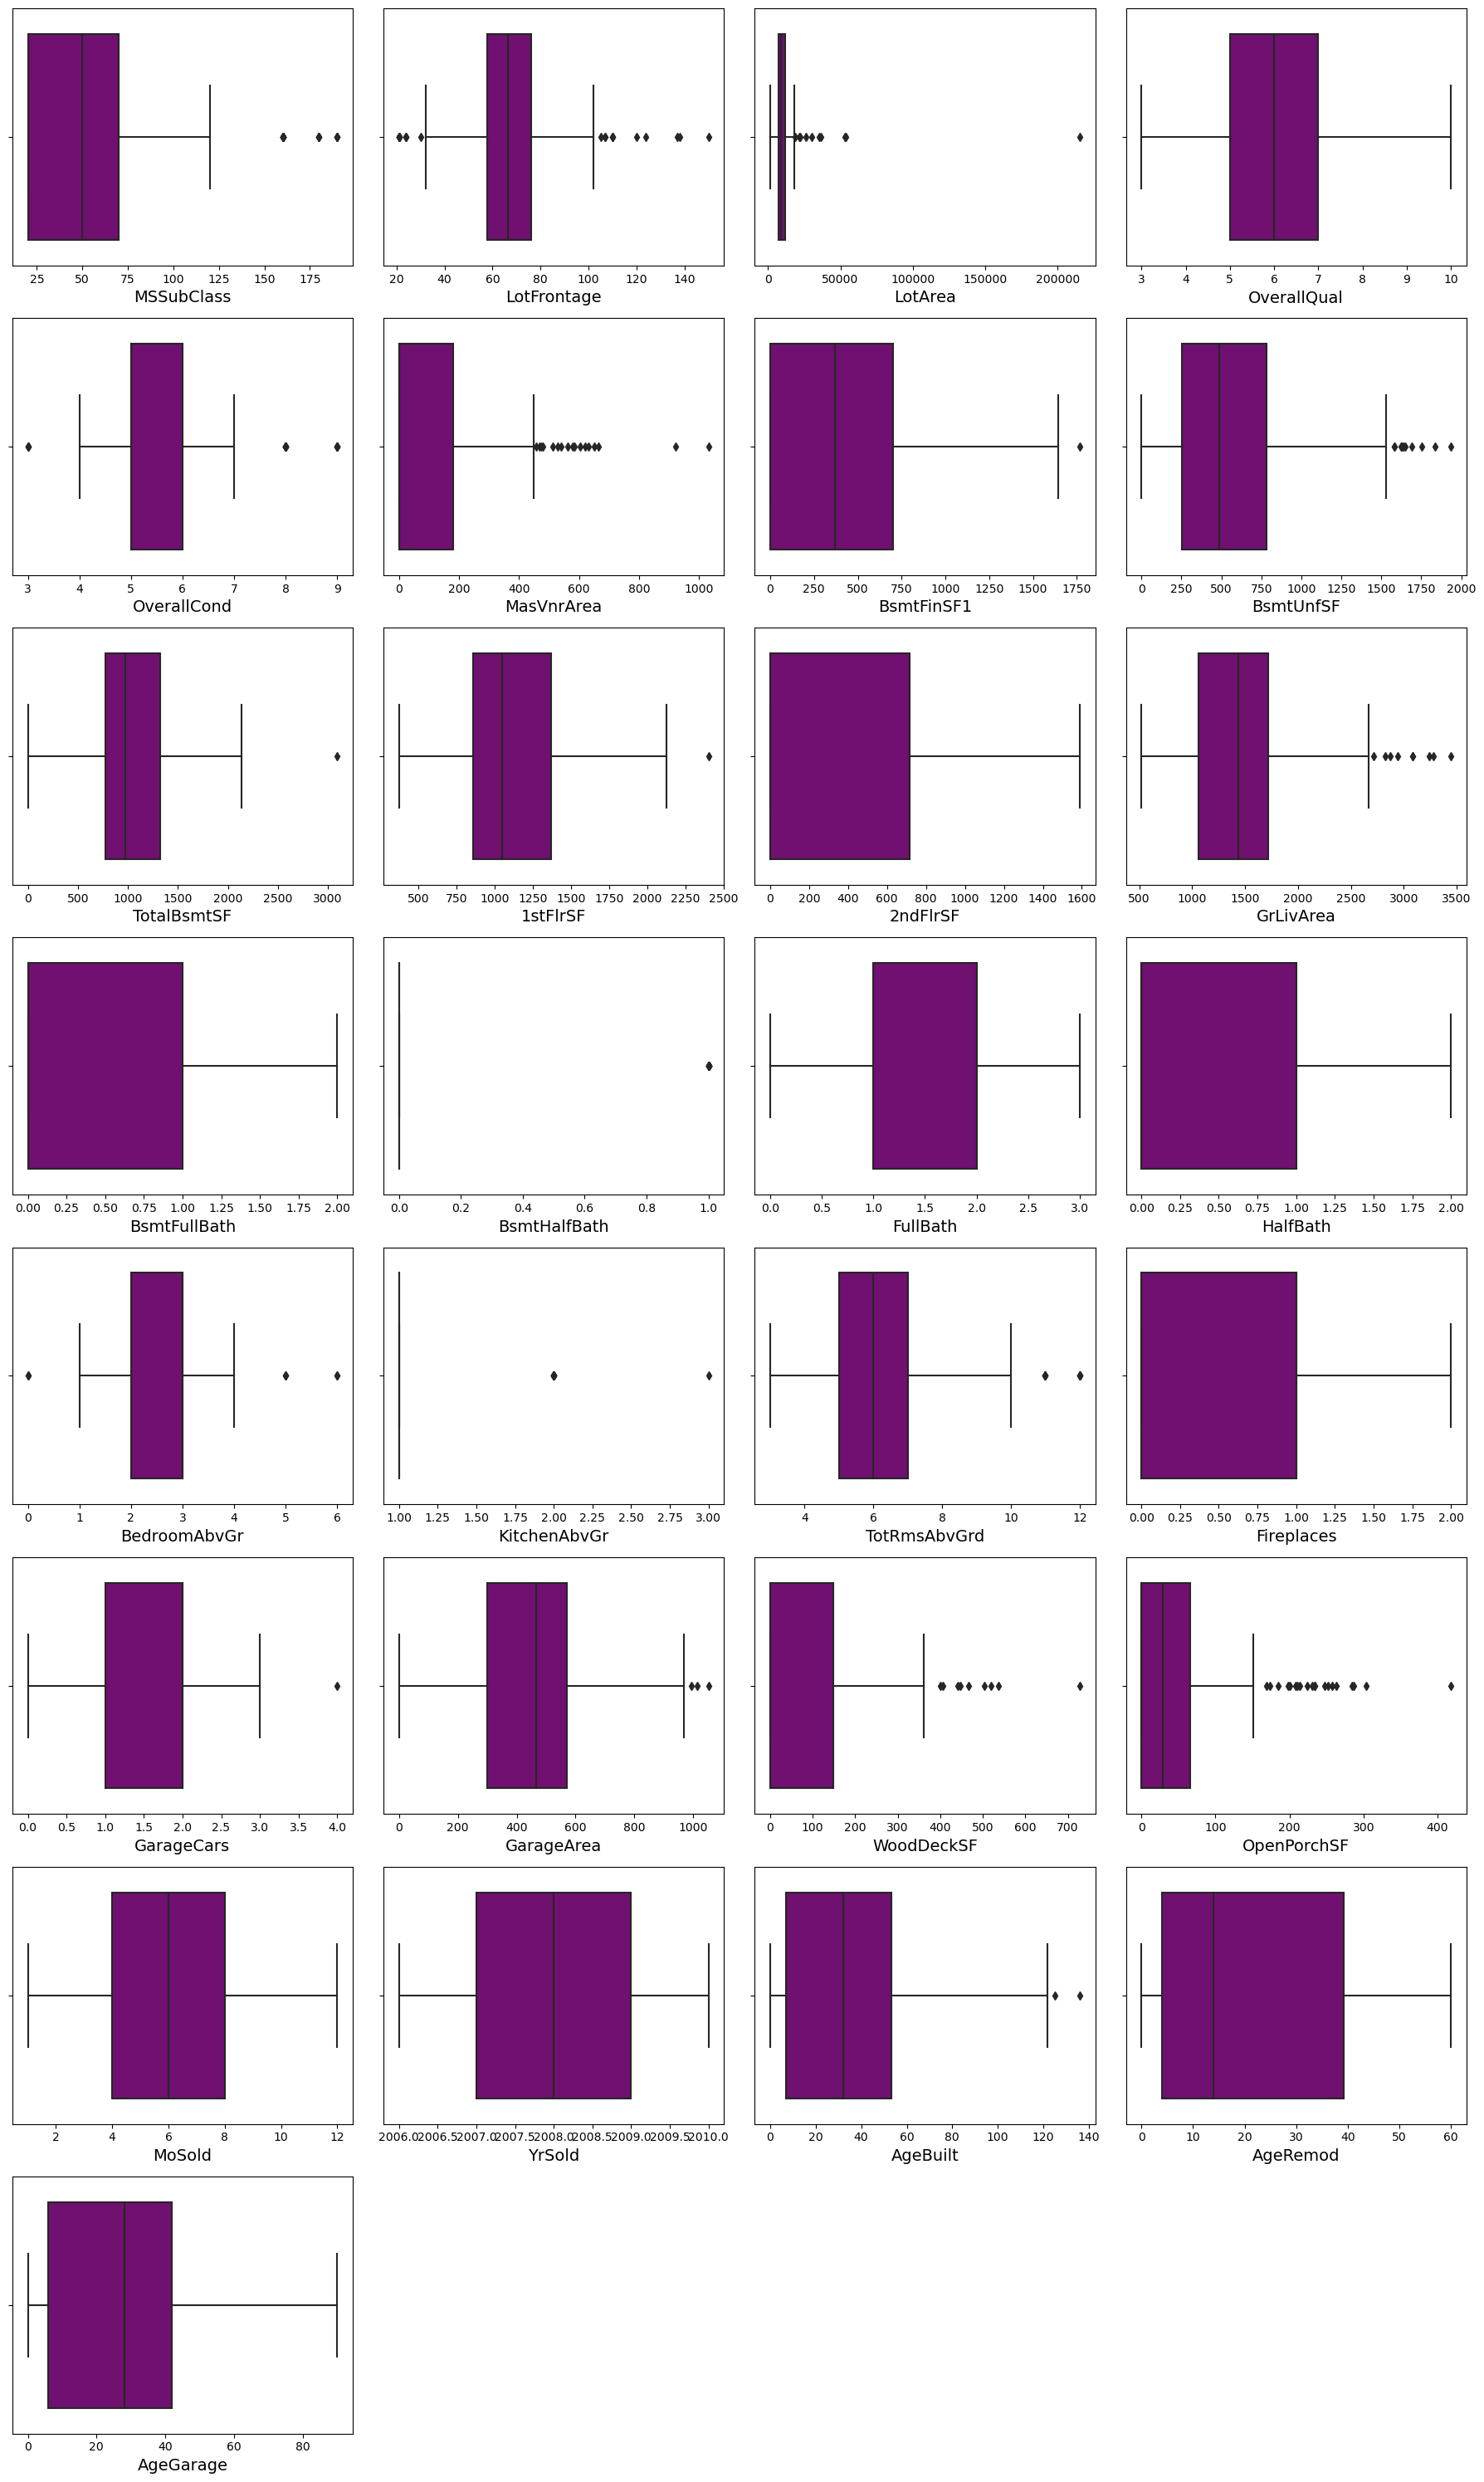

In [67]:
# Identifying the outliers using boxplot
plt.figure(figsize=(18,30),facecolor='white')
plotnumber=1
for column in numerical_coltest:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(test_df[column],color="purple")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

*Outliers present in all the columns except OverallQual, 2ndFlrSF,BsmtFullBath, FullBath, HalfBath, FirePlaces, MoSold, YrSold, AgeRemod and AgeGarage.
*The column OverallCond seems to be categorical so, I am not removing outliers in this columns.

# Let's remove the outliers in the remaining columns using both Zscore and IQR method and compare the dataloss.


Removing outliers in test dataset


# Zscore method

In [68]:
# Feature containing outliers
features_te = test_df[['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'AgeBuilt']]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features_te))

In [69]:
# Creating new dataframe
new_test_df = test_df[(z<3).all(axis=1)] 
new_test_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          20       RL    86.000000    14157   Pave      IR1         HLS   
1         120       RL    66.425101     5814   Pave      IR1         Lvl   
2          20       RL    66.425101    11838   Pave      Reg         Lvl   
3          70       RL    75.000000    12000   Pave      Reg         Bnk   
4          60       RL    86.000000    14598   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood  ... PavedDrive WoodDeckSF OpenPorchSF  \
0    Corner       Gtl      StoneBr  ...          Y        178          51   
1   CulDSac       Gtl      StoneBr  ...          Y         63           0   
2    Inside       Gtl      CollgCr  ...          Y        202         151   
3    Inside       Gtl      Crawfor  ...          Y          0           0   
4   CulDSac       Gtl      Somerst  ...          Y        100          18   

  MoSold  YrSold  SaleType SaleCondition AgeBuilt AgeRemod AgeGarage  
0      7    2007        WD        Normal        2        1       2.0  
1      8    2009       COD       Abnorml       25       25      25.0  
2      6    2009        WD        Normal        8        8       8.0  
3      7    2009        WD        Normal       68       59      68.0  
4      1    2008        WD        Normal        1        1       1.0  

[5 rows x 67 columns]

This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3

In [70]:
# Checking the shape of dataset before and after removing outliers
print("Shape of test dataset before removing outliers:", test_df.shape)
print("Shape of test dataset after removing outliers:", new_test_df.shape)

Shape of test dataset before removing outliers: (292, 67)
Shape of test dataset after removing outliers: (234, 67)


In [71]:
# Checking the the data loss after removing outliers
data_loss = (292-234)/292*100
data_loss

19.863013698630137

# By using Zscore I am losing around 19.86% of data which is not acceptable. The acceptable range of data loss is less than 10. So let's try to remove outliers using IQR method.

# IQR (Inter Quantile Range) method

In [72]:
# 1st quantile
Q1=features_te.quantile(0.25)

# 3rd quantile
Q3=features_te.quantile(0.75)

# IQR
IQR=Q3 - Q1

test_df1=test_df[~((test_df < (Q1 - 1.5 * IQR)) |(test_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [73]:
print("Shape of test data after using IQR method:", test_df1.shape)

Shape of test data after using IQR method: (181, 67)


In [74]:
# Checking the the data loss after removing outliers
data_loss = (292-181)/292*100
data_loss

38.013698630136986

# By using Zscore and IQR method I am losing large amount of data, let's use percentile method to remove the outliers by setting the dataloss to 2%.

# Percentile Method

In [75]:
# Removing outliers in train data using percentile method 
for col1 in features_te:
    if test_df[col1].dtypes != 'object':
        percentile = test_df[col1].quantile([0.01,0.98]).values
        test_df[col1][test_df[col1]<=percentile[0]]=percentile[0]
        test_df[col1][test_df[col1]>=percentile[1]]=percentile[1]

# I have removed the outliers present in train dataset using percentile method.

# Checking for skewness in train data

In [76]:
# Checking the skewness
train_df.skew()

MSSubClass      1.422019
LotFrontage     0.188060
LotArea         1.191912
OverallQual     0.175082
OverallCond     0.580714
MasVnrArea      1.873138
BsmtFinSF1      0.639523
BsmtUnfSF       0.777624
TotalBsmtSF     0.166773
1stFlrSF        0.645842
2ndFlrSF        0.717390
GrLivArea       0.592755
BsmtFullBath    0.355224
BsmtHalfBath    3.954345
FullBath        0.057809
HalfBath        0.656492
BedroomAbvGr   -0.145762
KitchenAbvGr    4.374289
TotRmsAbvGrd    0.443931
Fireplaces      0.552677
GarageCars     -0.434745
GarageArea     -0.135675
WoodDeckSF      1.053617
OpenPorchSF     1.513678
MoSold          0.220979
YrSold          0.115765
SalePrice       1.953878
AgeBuilt        0.469054
AgeRemod        0.495051
AgeGarage       0.598789
dtype: float64

# Removing Skewness

In [77]:
# Removing skewness using yeo-johnson  method to get better prediction
skew1 = ["MSSubClass","LotArea","MasVnrArea","BsmtFinSF1","BsmtUnfSF","1stFlrSF","2ndFlrSF","GrLivArea","BsmtHalfBath","HalfBath","KitchenAbvGr","Fireplaces","WoodDeckSF","OpenPorchSF","AgeGarage"]

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [78]:
train_df[skew1] = scaler.fit_transform(train_df[skew1].values)
train_df[skew1].head()

MSSubClass   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  1stFlrSF  \
0    1.370435 -1.306083   -0.822896   -0.117054   0.916764 -0.481887   
1   -1.167999  1.356458   -0.822896    0.395541   1.042594  2.082190   
2    0.490047  0.113089   -0.822896    0.934402  -0.510359  0.048689   
3   -1.167999  0.530989    1.385487    0.803940   1.178365  1.665038   
4   -1.167999  1.497522    1.140684    1.189724  -0.230032  1.201931   

   2ndFlrSF  GrLivArea  BsmtHalfBath  HalfBath  KitchenAbvGr  Fireplaces  \
0 -0.871789  -1.281768     -0.238775 -0.782707           0.0    0.779453   
1 -0.871789   1.377184     -0.238775 -0.782707           0.0    0.779453   
2  1.177246   1.060650     -0.238775  1.268421           0.0    0.779453   
3 -0.871789   0.775546     -0.238775 -0.782707           0.0    0.779453   
4 -0.871789   0.322952      4.188040 -0.782707           0.0    0.779453   

   WoodDeckSF  OpenPorchSF  AgeGarage  
0   -0.960144     1.423871   0.284279  
1    0.783831     1.428474   0.520844  
2    1.047285     1.208580  -0.652949  
3   -0.960144     1.178672   0.389131  
4    1.139237    -1.062308   0.354804

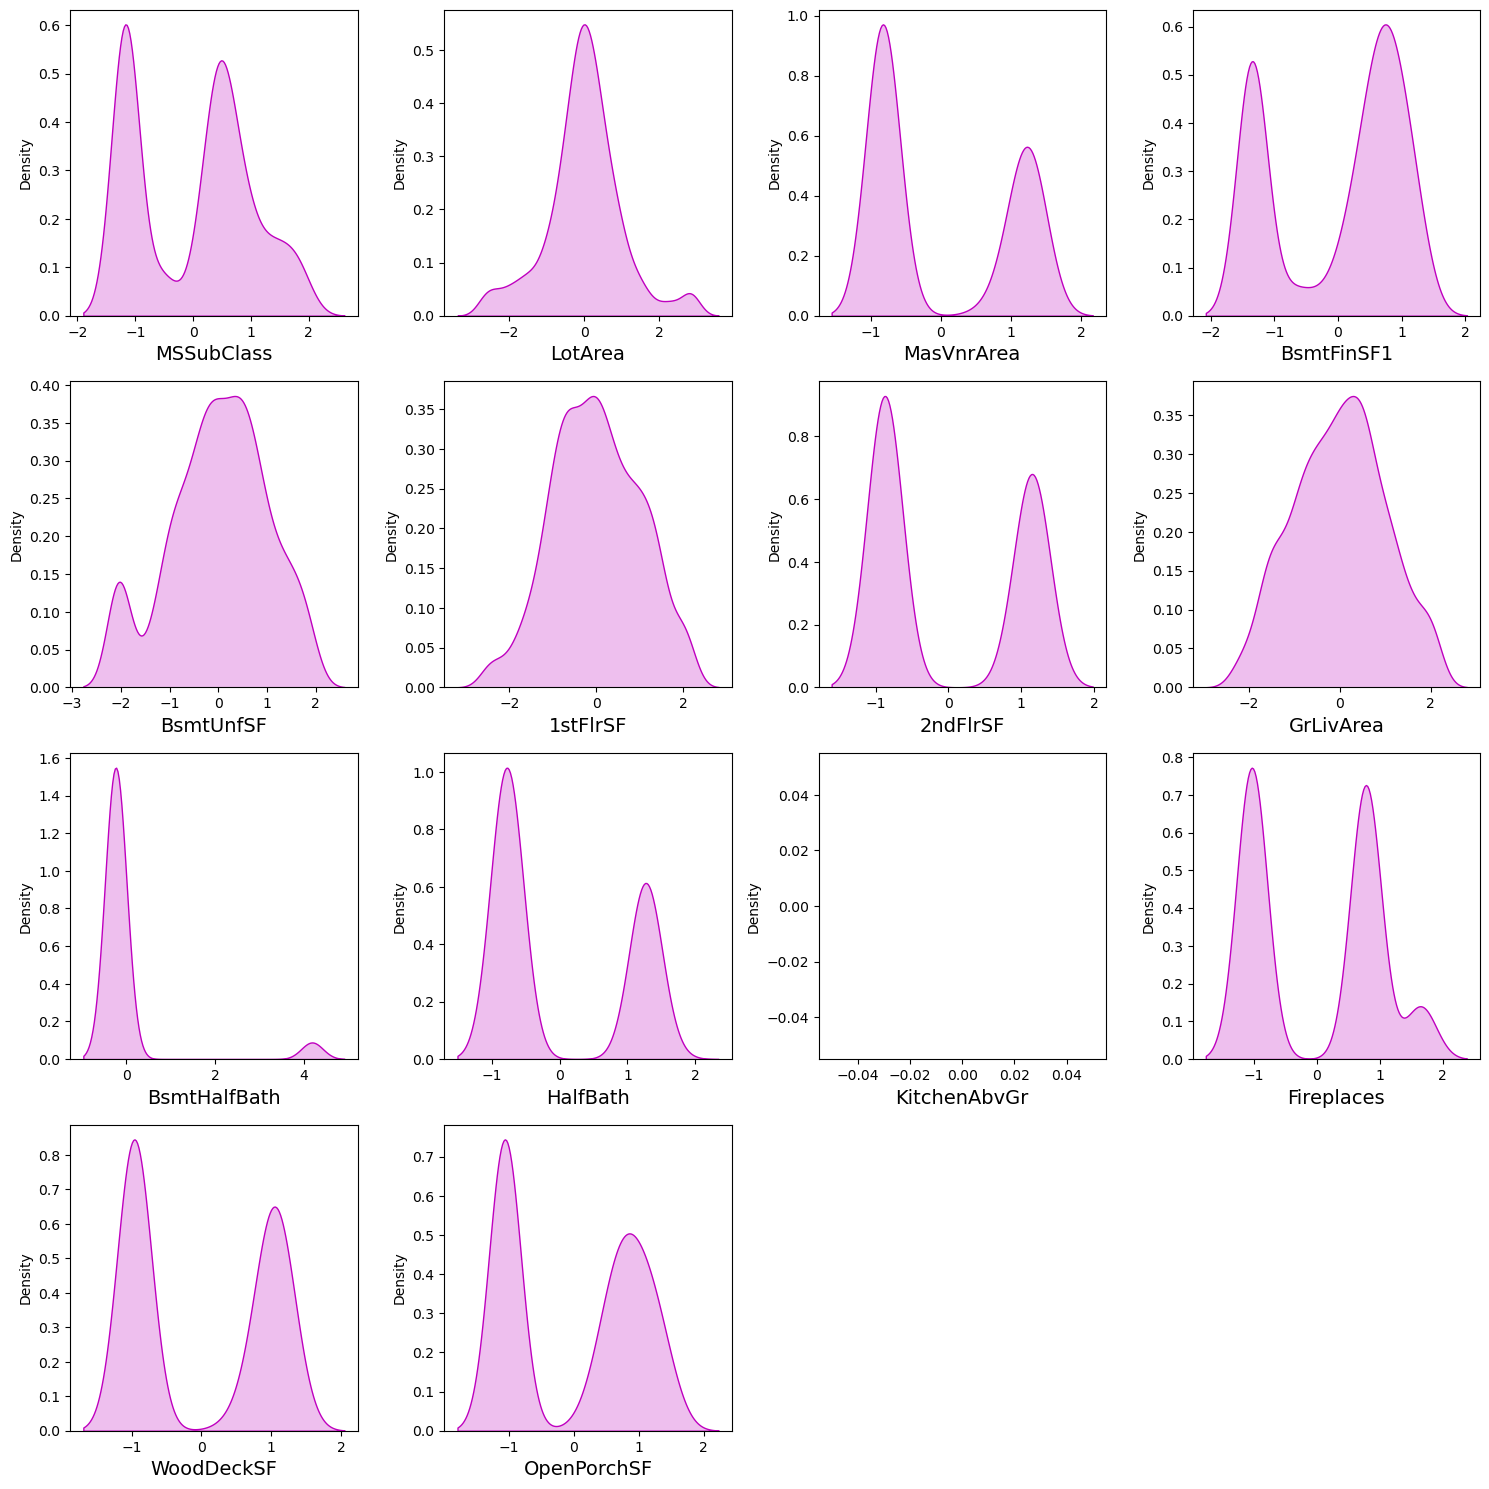

In [79]:
# Checking how the data has been distriubted in each column after removing skewness

plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in train_df[skew1] :
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(train_df[column],color="m",kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [80]:
# Checking skewness after using yeo-johnson method
train_df[skew1].skew()

MSSubClass      0.064007
LotArea         0.077861
MasVnrArea      0.415092
BsmtFinSF1     -0.418554
BsmtUnfSF      -0.304290
1stFlrSF       -0.000731
2ndFlrSF        0.279883
GrLivArea      -0.005974
BsmtHalfBath    3.954345
HalfBath        0.498003
KitchenAbvGr    0.000000
Fireplaces      0.076595
WoodDeckSF      0.110387
OpenPorchSF    -0.010092
AgeGarage      -0.217611
dtype: float64

In [81]:
# Dropping irrelevant colum
train_df.drop("KitchenAbvGr",axis=1,inplace=True)

# Checking for skewness in test data

In [82]:
# Checking the skewness
test_df.skew()

MSSubClass      1.323471
LotFrontage    -0.017005
LotArea         1.266527
OverallQual     0.397312
OverallCond     1.209714
MasVnrArea      1.545675
BsmtFinSF1      0.639990
BsmtUnfSF       0.873375
TotalBsmtSF     0.149160
1stFlrSF        0.596239
2ndFlrSF        0.765511
GrLivArea       0.790479
BsmtFullBath    0.463685
BsmtHalfBath    3.544994
FullBath       -0.049800
HalfBath        0.758892
BedroomAbvGr   -0.345731
KitchenAbvGr    4.253608
TotRmsAbvGrd    0.627431
Fireplaces      0.540164
GarageCars     -0.356072
GarageArea      0.051450
WoodDeckSF      1.317908
OpenPorchSF     1.790292
MoSold          0.186504
YrSold          0.018412
AgeBuilt        0.623131
AgeRemod        0.533693
AgeGarage       0.678577
dtype: float64

# Removing skewness

In [83]:
# Removing skewness using yeo-johnson  method to get better prediction
skew2 = ["MSSubClass","LotArea","MasVnrArea","BsmtFinSF1","BsmtUnfSF","1stFlrSF","2ndFlrSF","GrLivArea","BsmtHalfBath","HalfBath","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","WoodDeckSF","OpenPorchSF","AgeBuilt","AgeGarage"]

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [84]:
test_df[skew2] = scaler.fit_transform(test_df[skew2].values)
test_df[skew2].head()

MSSubClass   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  1stFlrSF  \
0   -1.149822  1.012372    1.184649    1.212776   0.459512  1.831025   
1    1.341197 -0.878055   -0.846660    1.071176  -0.847801  0.748588   
2   -1.149822  0.565525   -0.846660   -1.376632   1.999450  1.606536   
3    0.706032  0.598156   -0.846660    0.235999  -0.094676 -0.717217   
4    0.507373  1.092887    0.953962   -1.376632   0.880166 -0.591803   

   2ndFlrSF  GrLivArea  BsmtHalfBath  HalfBath  KitchenAbvGr  TotRmsAbvGrd  \
0 -0.870294   0.966245     -0.263813 -0.738058           0.0      0.981907   
1 -0.870294  -0.083846     -0.263813 -0.738058           0.0     -1.613568   
2 -0.870294   0.744611     -0.263813 -0.738058           0.0      0.449228   
3  1.137231   0.337234     -0.263813  1.349285           0.0      0.449228   
4  1.211129   0.983798     -0.263813  1.349285           0.0      1.463878   

   Fireplaces  WoodDeckSF  OpenPorchSF  AgeBuilt  AgeGarage  
0    0.808861    1.121289     0.720332 -1.417238  -1.398277  
1    0.808861    0.815051    -1.112306 -0.008559   0.159148  
2    0.808861    1.156129     1.287751 -0.830966  -0.763392  
3    0.808861   -0.913781    -1.112306  1.066994   1.406311  
4    0.808861    0.955750     0.216312 -1.583151  -1.573401

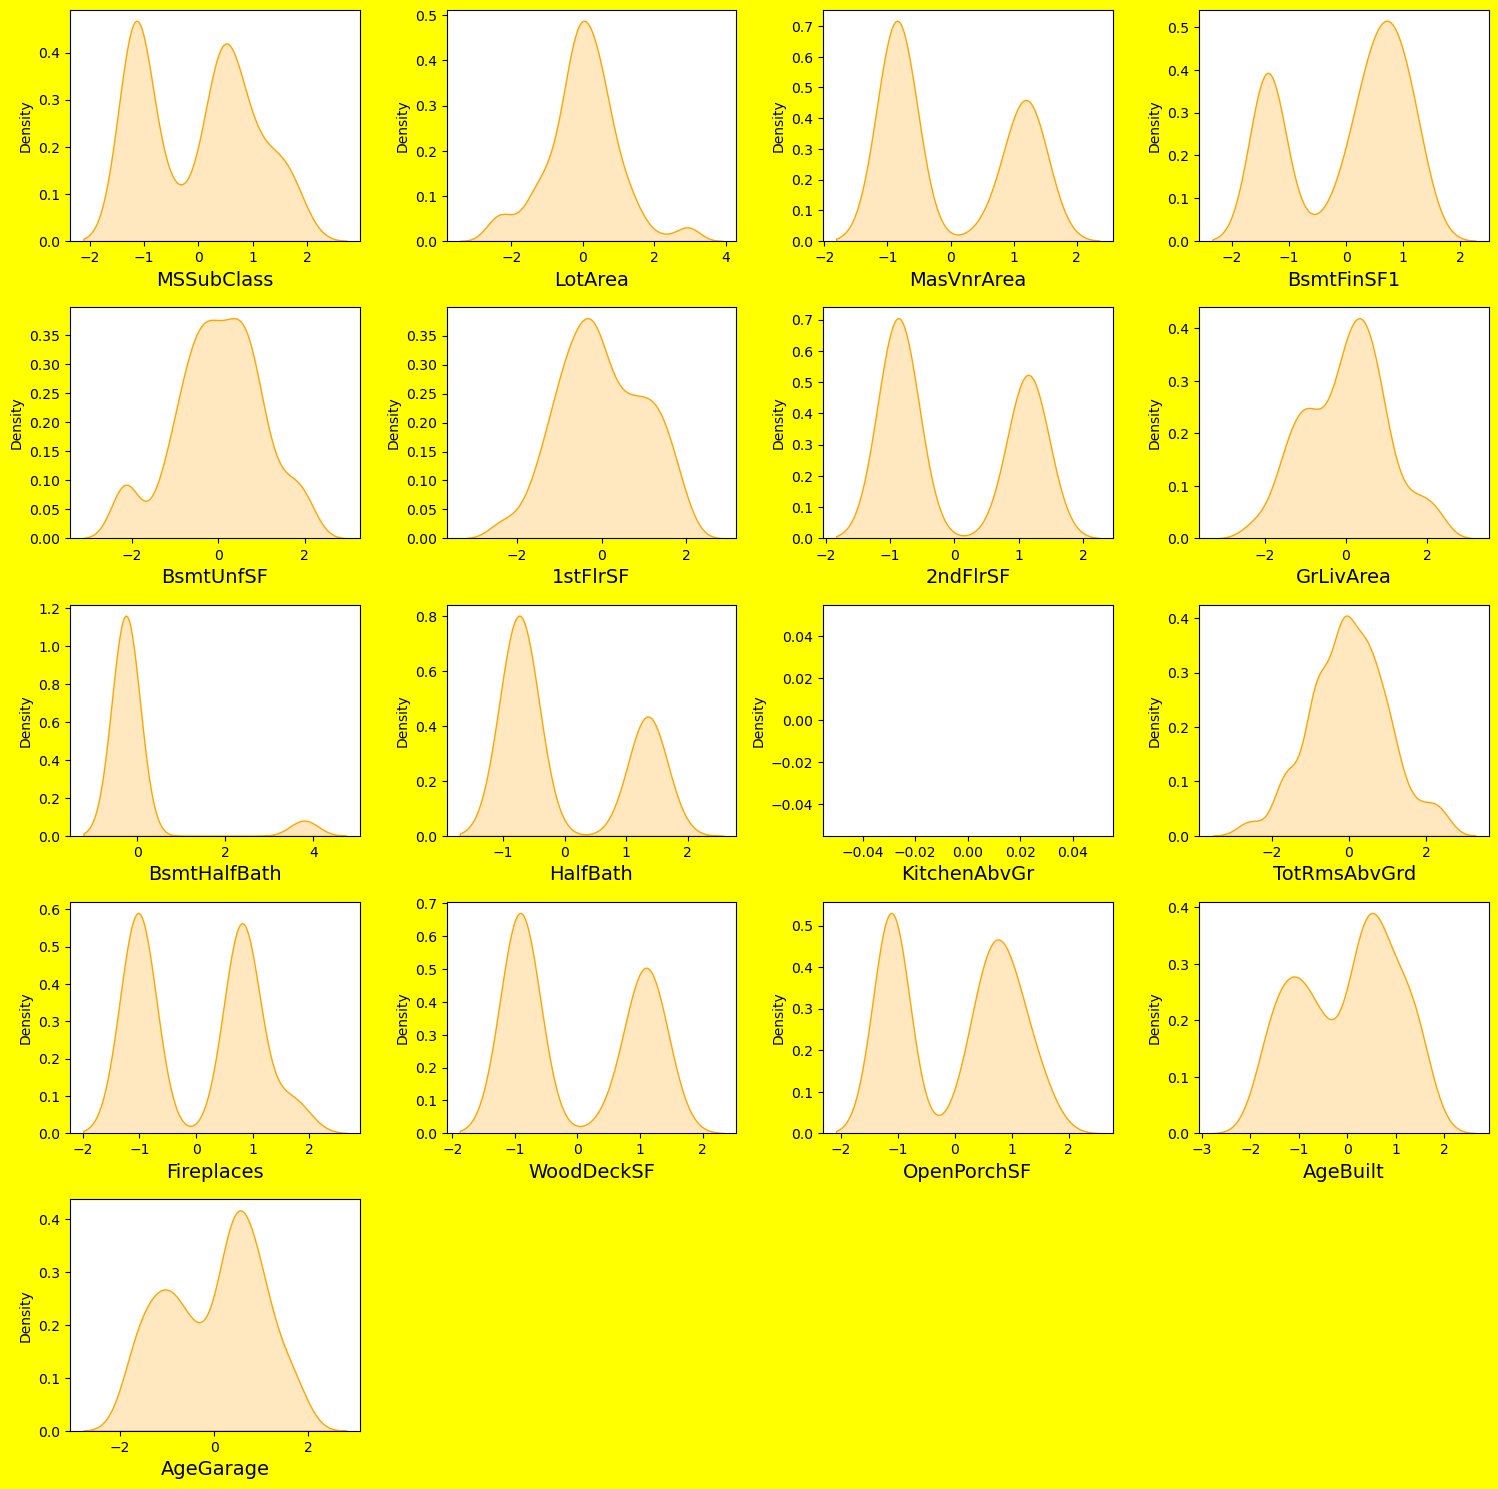

In [85]:
# Checking how the data has been distriubted in each column after removing skewness

plt.figure(figsize=(15,15),facecolor='yellow')
plotnumber=1
for column in test_df[skew2] :
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(test_df[column],color="orange",kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [86]:
# Checking skewness after using yeo-johnson method
test_df[skew2].skew()

MSSubClass      0.088585
LotArea         0.075717
MasVnrArea      0.362294
BsmtFinSF1     -0.447437
BsmtUnfSF      -0.247815
1stFlrSF        0.003835
2ndFlrSF        0.284246
GrLivArea      -0.003046
BsmtHalfBath    3.544994
HalfBath        0.621093
KitchenAbvGr    0.000000
TotRmsAbvGrd    0.000698
Fireplaces      0.076669
WoodDeckSF      0.208541
OpenPorchSF    -0.065103
AgeBuilt       -0.190514
AgeGarage      -0.186322
dtype: float64

In [87]:
test_df.drop("KitchenAbvGr",axis=1,inplace=True)

#The column KitchenAbvGr has skewness zero which means it contains only one unique value that is zero throughout the dataset, So I can drop this column as well.


# Encoding the dataset

In [88]:
column = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for i in column:
    train_df[i] = train_df[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})

In [89]:
# Encoding train dataframe using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in train_df.columns:
    if train_df[i].dtypes == "object":
        train_df[i] = enc.fit_transform(train_df[i].values.reshape(-1,1))

In [90]:
train_df.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  \
0    1.370435       3.0     70.98847 -1.306083     1.0       0.0          3.0   
1   -1.167999       3.0     95.00000  1.356458     1.0       0.0          3.0   
2    0.490047       3.0     92.00000  0.113089     1.0       0.0          3.0   
3   -1.167999       3.0    105.00000  0.530989     1.0       0.0          3.0   
4   -1.167999       3.0     70.98847  1.497522     1.0       0.0          3.0   

   LotConfig  LandSlope  Neighborhood  ...  WoodDeckSF  OpenPorchSF  MoSold  \
0        4.0        0.0          13.0  ...   -0.960144     1.423871       2   
1        4.0        1.0          12.0  ...    0.783831     1.428474      10   
2        1.0        0.0          15.0  ...    1.047285     1.208580       6   
3        4.0        0.0          14.0  ...   -0.960144     1.178672       1   
4        2.0        0.0          14.0  ...    1.139237    -1.062308       6   

   YrSold  SaleType  SaleCondition  SalePrice  AgeBuilt  AgeRemod  AgeGarage  
0    2007       8.0            4.0     128000      31.0        31   0.284279  
1    2007       8.0            4.0     268000      37.0        37   0.520844  
2    2007       8.0            4.0     269790      11.0        10  -0.652949  
3    2010       0.0            4.0     190000      33.0        33   0.389131  
4    2009       8.0            4.0     215000      32.0         9   0.354804  

[5 rows x 67 columns]

# I have encoded object data types into numerical using OrdinalEncoder method

# Correlation between the label and features using HEAT map in Train dataset

In [91]:
# Checking the correlation between features and the target
cor = train_df.corr()
cor

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.026898    -0.316274 -0.312939 -0.017924   
MSZoning         0.026898  1.000000    -0.084834 -0.058912  0.140215   
LotFrontage     -0.316274 -0.084834     1.000000  0.596143 -0.044573   
LotArea         -0.312939 -0.058912     0.596143  1.000000 -0.072669   
Street          -0.017924  0.140215    -0.044573 -0.072669  1.000000   
...                   ...       ...          ...       ...       ...   
SaleCondition   -0.027825  0.004501     0.076587  0.046115  0.014176   
SalePrice       -0.001252 -0.133221     0.358470  0.394343  0.044753   
AgeBuilt         0.005669  0.296616    -0.129581 -0.029530 -0.022127   
AgeRemod        -0.055151  0.174282    -0.081202 -0.031184 -0.059127   
AgeGarage       -0.058538  0.278292    -0.072003  0.019759 -0.024426   

               LotShape  LandContour  LotConfig  LandSlope  Neighborhood  ...  \
MSSubClass     0.067516    -0.030467   0.057130  -0.016595     -0.011619  ...   
MSZoning       0.053655     0.001175  -0.027246  -0.023952     -0.251833  ...   
LotFrontage   -0.157341    -0.016620  -0.201691   0.023253      0.091671  ...   
LotArea       -0.287003    -0.074834  -0.198998   0.176280      0.075420  ...   
Street        -0.012941     0.105226   0.000153  -0.141572      0.001420  ...   
...                 ...          ...        ...        ...           ...  ...   
SaleCondition -0.054905     0.047715   0.043692  -0.061461      0.042340  ...   
SalePrice     -0.248171     0.032836  -0.060452   0.015485      0.198942  ...   
AgeBuilt       0.231985    -0.157325  -0.009967   0.087505     -0.117093  ...   
AgeRemod       0.156811    -0.086335   0.008653   0.048260     -0.089821  ...   
AgeGarage      0.166010    -0.097389  -0.003350   0.100285     -0.124170  ...   

               WoodDeckSF  OpenPorchSF    MoSold    YrSold  SaleType  \
MSSubClass       0.038922     0.062935  0.010865 -0.042020  0.064683   
MSZoning         0.006946    -0.182359 -0.051646 -0.004964  0.079854   
LotFrontage      0.065003     0.168784  0.027718 -0.005074 -0.040647   
LotArea          0.125098     0.146222  0.021311 -0.039843 -0.022130   
Street           0.022918     0.017900 -0.008860 -0.019635  0.025920   
...                   ...          ...       ...       ...       ...   
SaleCondition    0.084122     0.135211 -0.003462  0.024505  0.143557   
SalePrice        0.310128     0.449961  0.072764 -0.045508 -0.050851   
AgeBuilt        -0.289535    -0.411553 -0.039361  0.056461  0.062211   
AgeRemod        -0.275631    -0.400530 -0.033912  0.030713 -0.019964   
AgeGarage       -0.289666    -0.438676 -0.027453  0.093733  0.080828   

               SaleCondition  SalePrice  AgeBuilt  AgeRemod  AgeGarage  
MSSubClass         -0.027825  -0.001252  0.005669 -0.055151  -0.058538  
MSZoning            0.004501  -0.133221  0.296616  0.174282   0.278292  
LotFrontage         0.076587   0.358470 -0.129581 -0.081202  -0.072003  
LotArea             0.046115   0.394343 -0.029530 -0.031184   0.019759  
Street              0.014176   0.044753 -0.022127 -0.059127  -0.024426  
...                      ...        ...       ...       ...        ...  
SaleCondition       1.000000   0.217687 -0.212974 -0.225851  -0.246566  
SalePrice           0.217687   1.000000 -0.526644 -0.510784  -0.516445  
AgeBuilt           -0.212974  -0.526644  1.000000  0.607949   0.799459  
AgeRemod           -0.225851  -0.510784  0.607949  1.000000   0.670098  
AgeGarage          -0.246566  -0.516445  0.799459  0.670098   1.000000  

[67 rows x 67 columns]

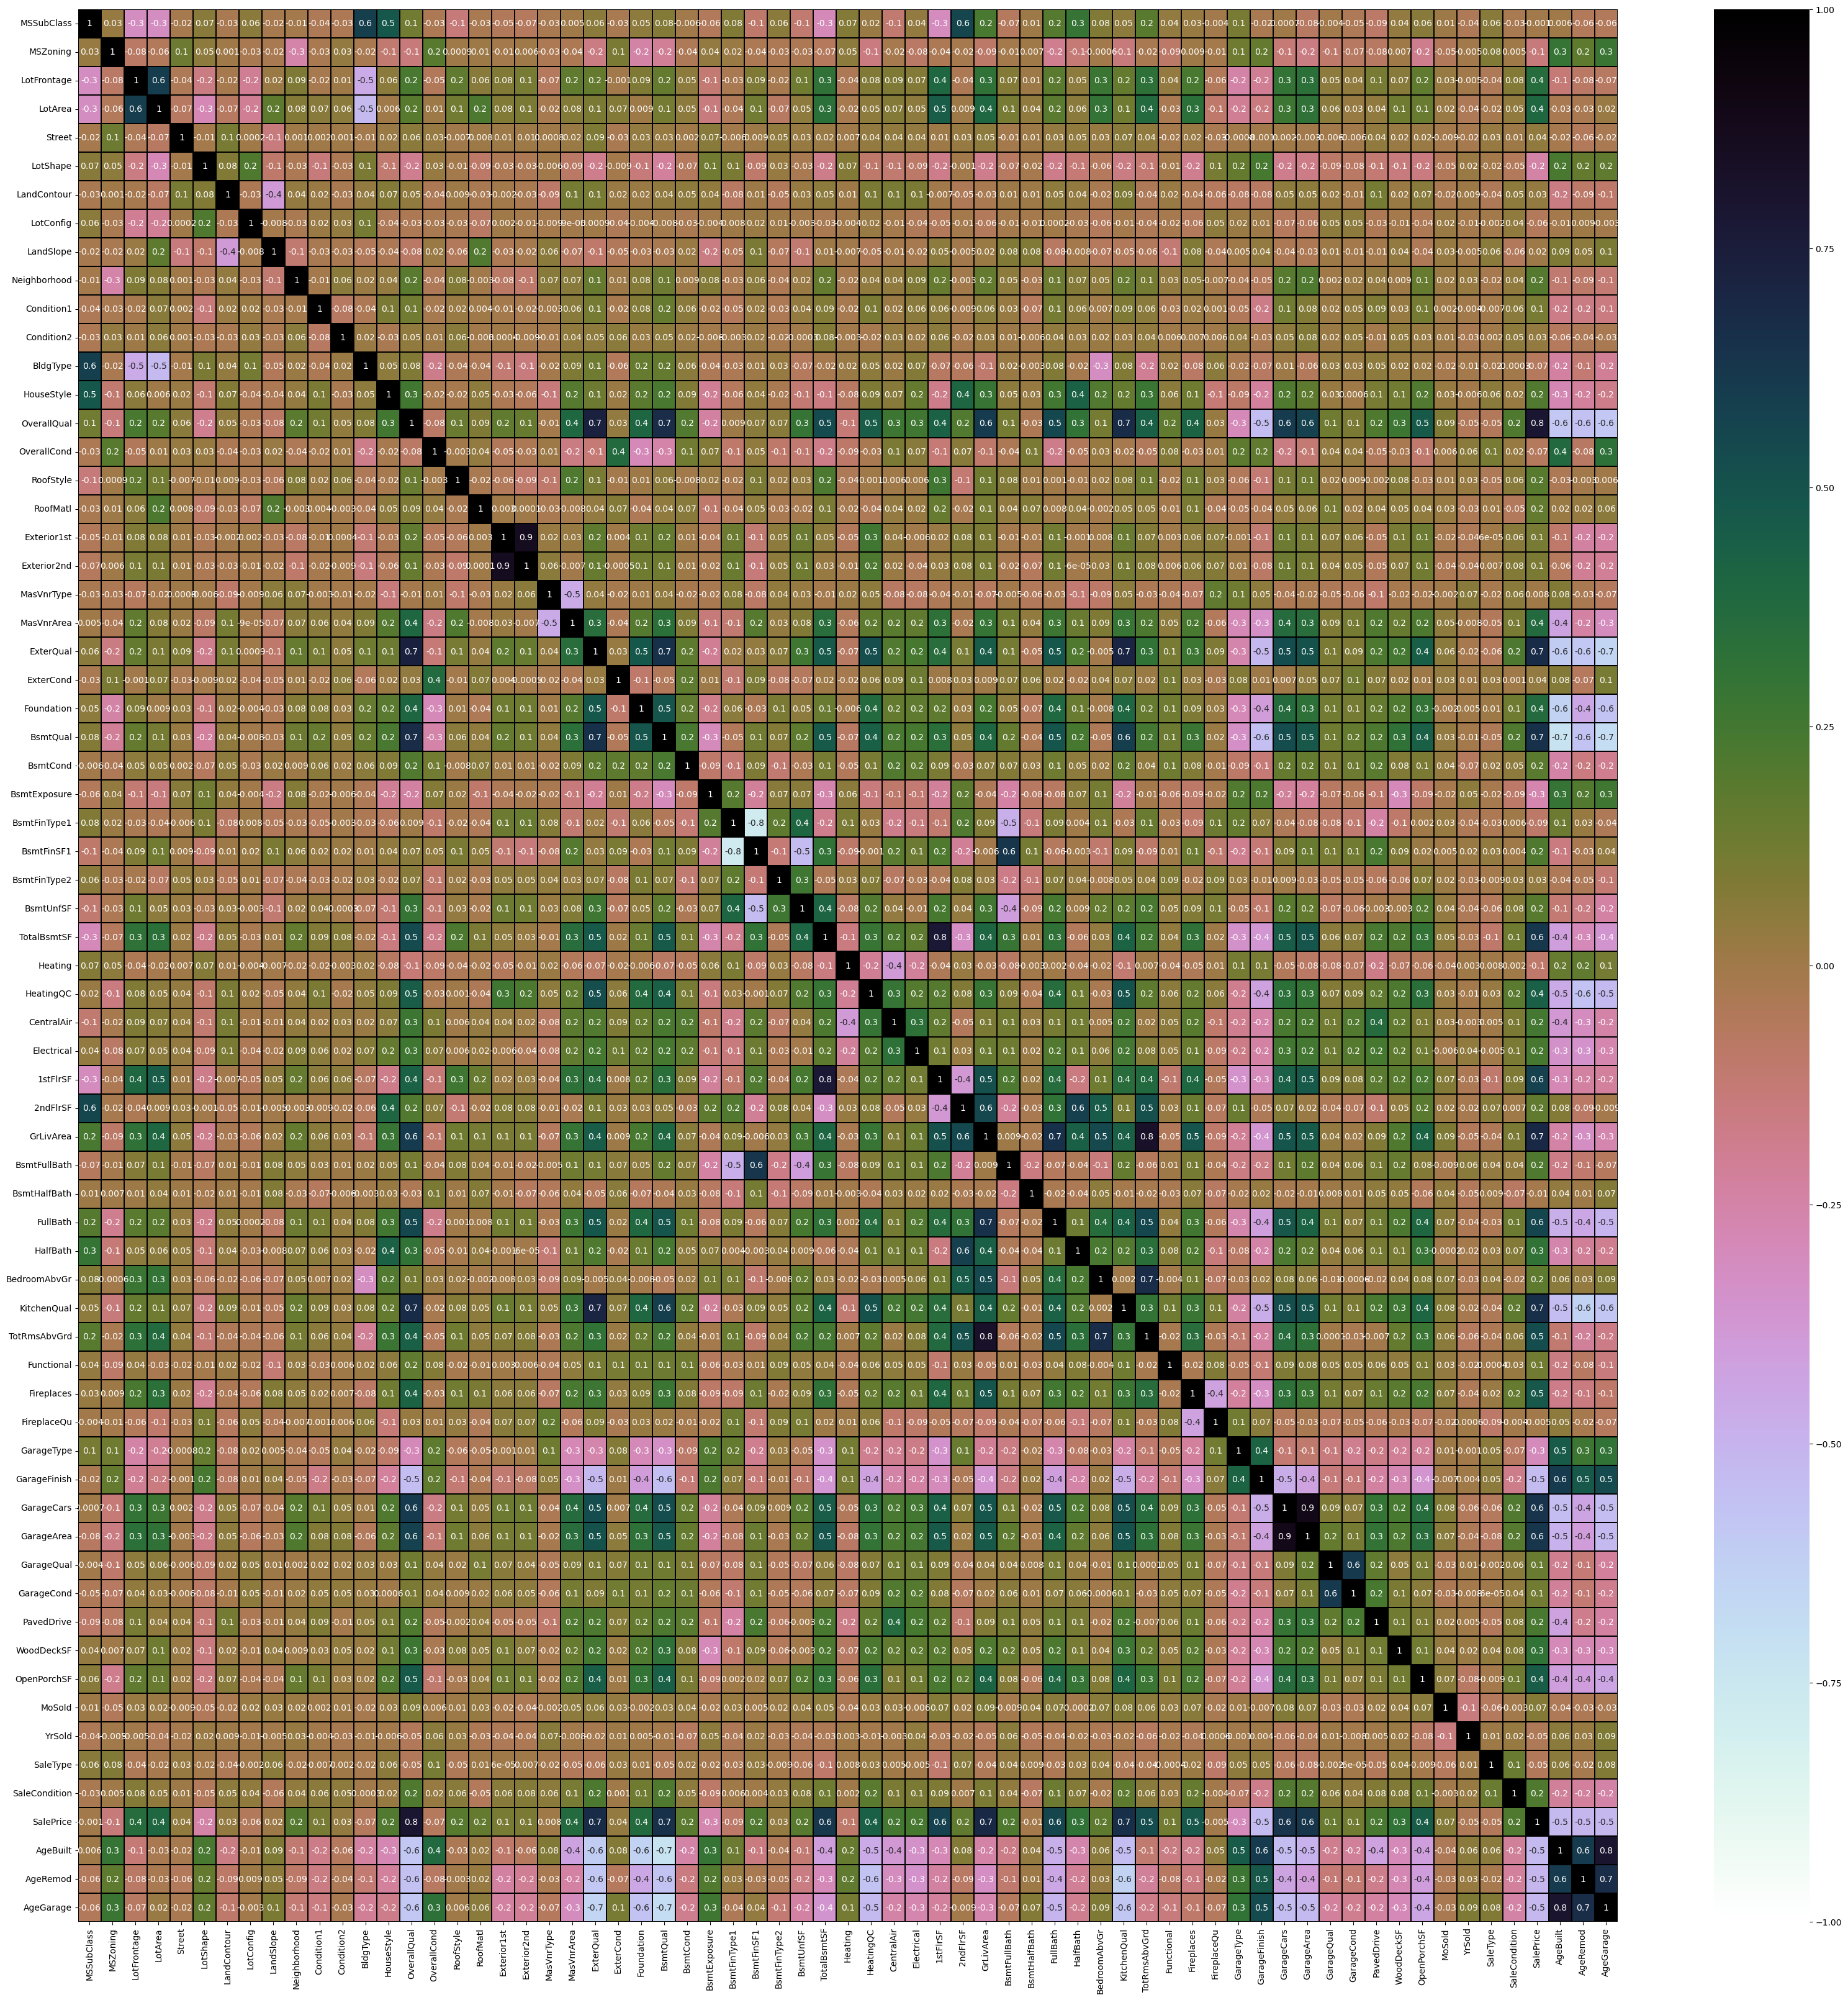

In [92]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(40,40))    
sns.heatmap(train_df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,cmap="cubehelix_r")
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.
Dark shades are positively correlated with the label and light shades are negatively correlated with the label SalePrice.

In [93]:
cor['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.789185
GrLivArea       0.688210
ExterQual       0.672665
KitchenQual     0.659228
                  ...   
GarageType     -0.299470
AgeRemod       -0.510784
AgeGarage      -0.516445
AgeBuilt       -0.526644
GarageFinish   -0.537121
Name: SalePrice, Length: 67, dtype: float64

In [94]:
cor['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.789185
GrLivArea       0.688210
ExterQual       0.672665
KitchenQual     0.659228
                  ...   
GarageType     -0.299470
AgeRemod       -0.510784
AgeGarage      -0.516445
AgeBuilt       -0.526644
GarageFinish   -0.537121
Name: SalePrice, Length: 67, dtype: float64

# I can observe the positive and negative correlation between features and label.

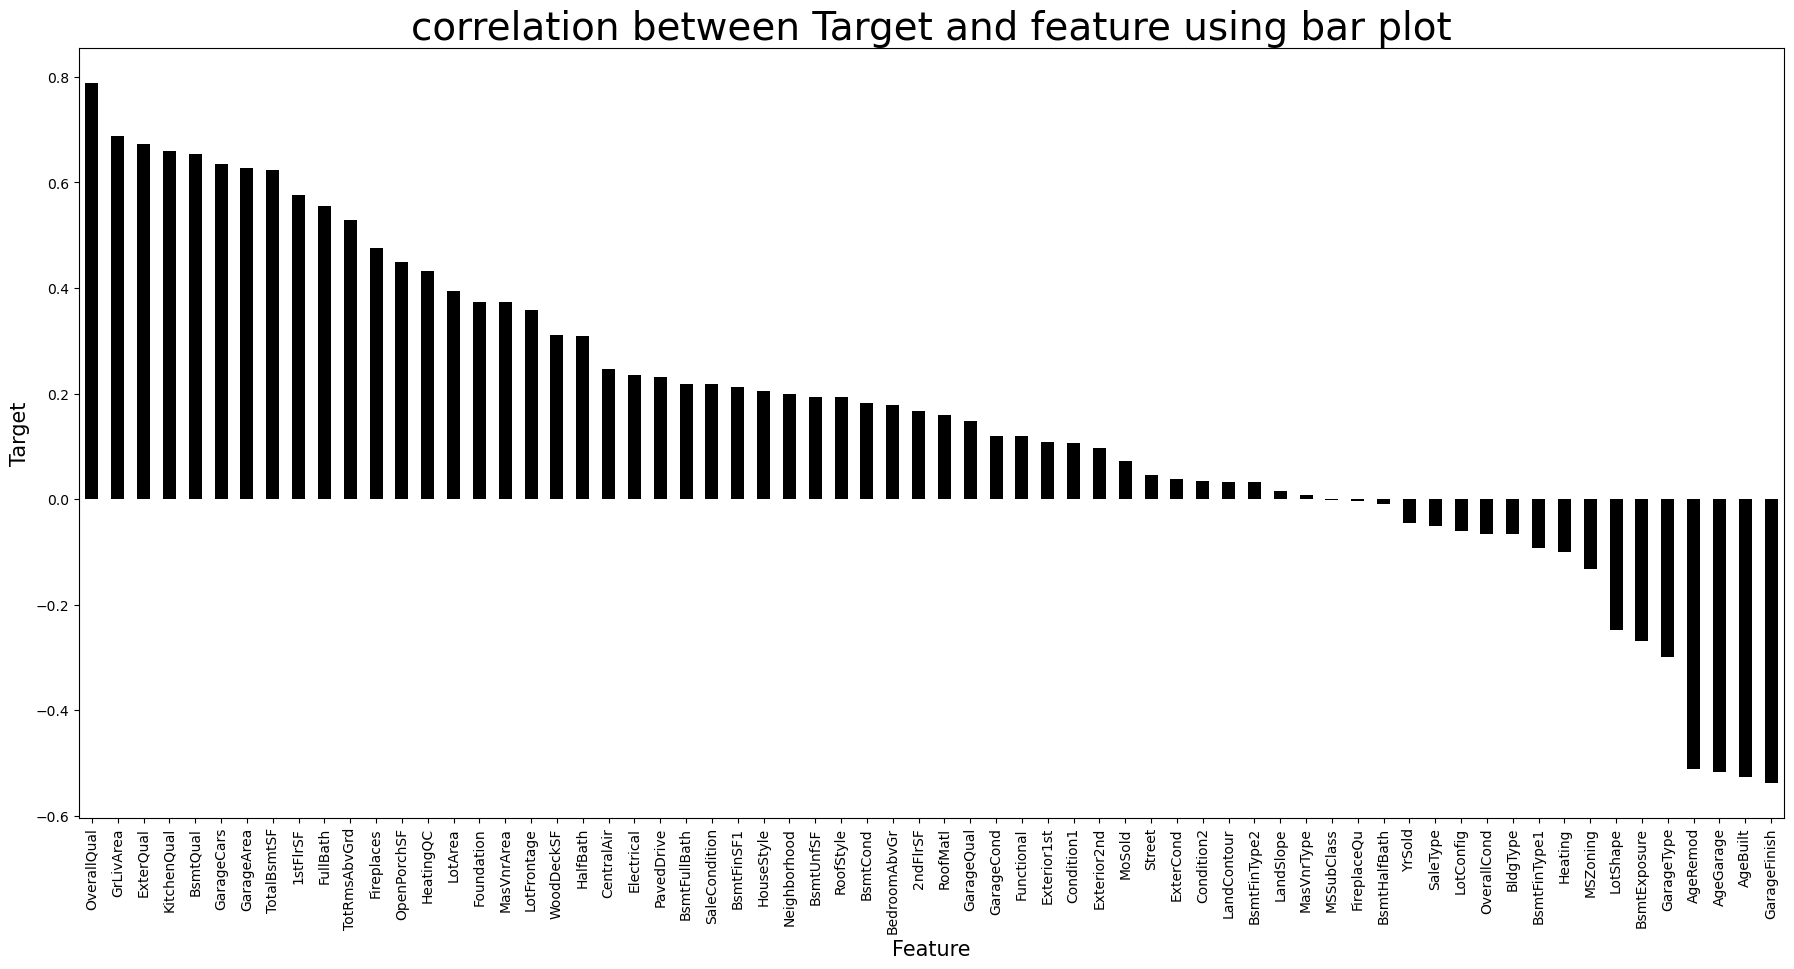

In [95]:
plt.figure(figsize=(22,10))
train_df.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar',color='black')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between Target and feature using bar plot',fontsize=28)
plt.show()

# I can observe the columns MSSubClass and FirePlaceQu have very less correlation with the label. I can drop this columns if necessary. But for now keeping them as it is.

# Separating the feature and label into x and y

In [96]:
x = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]

In [97]:
# Dimension of x and y
x.shape, y.shape

((1168, 66), (1168,))

# Lets Scale Train data using StandardScaler

In [98]:
from sklearn.preprocessing import StandardScaler
# Scaling data
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0    1.370435 -0.021646     0.039092 -1.306083  0.058621 -1.373107   
1   -1.167999 -0.021646     1.321126  1.356458  0.058621 -1.373107   
2    0.490047 -0.021646     1.160948  0.113089  0.058621 -1.373107   
3   -1.167999 -0.021646     1.855050  0.530989  0.058621 -1.373107   
4   -1.167999 -0.021646     0.039092  1.497522  0.058621 -1.373107   

   LandContour  LotConfig  LandSlope  Neighborhood  ...  PavedDrive  \
0     0.318473   0.606420  -0.226126      0.142224  ...    0.291828   
1     0.318473   0.606420   3.295414     -0.024227  ...    0.291828   
2     0.318473  -1.220661  -0.226126      0.475125  ...    0.291828   
3     0.318473   0.606420  -0.226126      0.308675  ...    0.291828   
4     0.318473  -0.611634  -0.226126      0.308675  ...    0.291828   

   WoodDeckSF  OpenPorchSF    MoSold    YrSold  SaleType  SaleCondition  \
0   -0.960144     1.423871 -1.617822 -0.605487  0.330033       0.207932   
1    0.783831     1.428474  1.361470 -0.605487  0.330033       0.207932   
2    1.047285     1.208580 -0.128176 -0.605487  0.330033       0.207932   
3   -0.960144     1.178672 -1.990233  1.651563 -4.612004       0.207932   
4    1.139237    -1.062308 -0.128176  0.899213  0.330033       0.207932   

   AgeBuilt  AgeRemod  AgeGarage  
0 -0.189926  0.382860   0.284279  
1  0.013316  0.671675   0.520844  
2 -0.867400 -0.627990  -0.652949  
3 -0.122178  0.479132   0.389131  
4 -0.156052 -0.676126   0.354804  

[5 rows x 66 columns]

# VIF(Variance Inflation Factor)

In [99]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                     for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values       Features
0     5.713488     MSSubClass
1     1.360230       MSZoning
2     2.034551    LotFrontage
3     2.646135        LotArea
4     1.105741         Street
..         ...            ...
61    1.123099       SaleType
62    1.194518  SaleCondition
63    8.466503       AgeBuilt
64    3.213674       AgeRemod
65    5.612681      AgeGarage

[66 rows x 2 columns]

# Here the column "GrLivArea" has VIF above 10 which means this feature causing multicollinearity problem. Let's drop this column.

In [100]:
x.drop("GrLivArea",axis=1,inplace=True)

In [101]:
# Checking VIF after removing the column
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                     for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values       Features
0     5.693084     MSSubClass
1     1.359386       MSZoning
2     2.030565    LotFrontage
3     2.644317        LotArea
4     1.099567         Street
..         ...            ...
60    1.121457       SaleType
61    1.194159  SaleCondition
62    8.343810       AgeBuilt
63    3.209383       AgeRemod
64    5.608571      AgeGarage

[65 rows x 2 columns]

# Now all the feature have VIF less than 10 which means multicollinearity problem has been solved.

# BUILDING ML MODELS FROM TRAIN DATASET

In [102]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [103]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9019175400384987  on Random_state  135


# Creating new train test split

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Regression Algorithms

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Linear Regression

In [106]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
lir=r2_score(y_test,predLR)
print('R2_score:',lir)


# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predLR))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predLR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

# Checking Cross Validation Score for Linear Regression
lr_cv=cross_val_score(LR,x,y,cv=5).mean()
print("Cross Validation Score:",lr_cv)

R2_score: 0.8608122957420054
MAE: 21876.533547727493
MSE: 986885144.7430624
RMSE: 31414.72815007417
Cross Validation Score: 0.8015392145523077


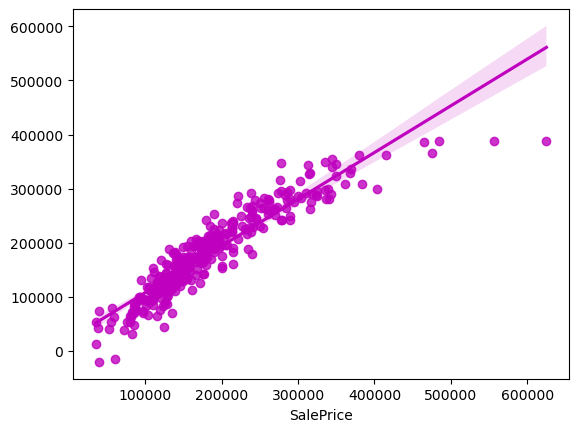

In [107]:
# Visualizing the predicteed values
sns.regplot(y_test,predLR,color="m")
plt.show()

# Created linear regression model and getting 84.73% R2 score using this model. From the above plot we can observe the sales price of the house. The best fit line shows there is strong linear relation between test data of trained model and predicted values.

# Regularization

# Lasso Regressor

In [108]:
# Checking r2score for Lasso Regressor
lasso=Lasso()

# Predictions
lasso.fit(x_train,y_train)
lasso.score(x_train,y_train)
pred_lasso=lasso.predict(x_test)
las=r2_score(y_test,pred_lasso)
print('R2_Score:',las)
print('MAE:',metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:',metrics.mean_squared_error(y_test, pred_lasso))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))

# Checking cv score for Lasso Regression
las_cv=cross_val_score(lasso,x,y,cv=5).mean()
print("Cross Validation Score:",las_cv)
dif2=las-las_cv

R2_Score: 0.8608196615403618
MAE: 21874.627823801708
MSE: 986832918.8872234
RMSE: 31413.896907057286
Cross Validation Score: 0.8015627825252072


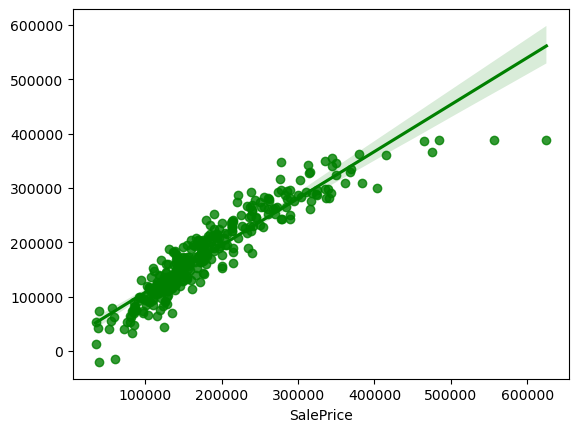

In [109]:
sns.regplot(y_test,pred_lasso,color="g")
plt.show()

# Created Lasso regressor model and getting 84.74% R2 score using this model. From the above plot we can observe the sales price of the house. The best fit line shows there is strong linear relation between test data of trained model and predicted values.

# Ridge Regressor

In [110]:
# Checking R2 score for Ridge regressor
ridge=Ridge(alpha=100)
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)
pred_ridge=ridge.predict(x_test)
rid=r2_score(y_test,pred_ridge)
print('R2_Score:',rid)
print('MAE:',metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:',metrics.mean_squared_error(y_test, pred_ridge))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))

# Checking cv score for Ridge regressor
cross_val_score(ridge,x,y,cv=5).mean()
rid_cv=cross_val_score(ridge,x,y,cv=5).mean()
print("Cross Validation Score:",rid_cv)
dif3=rid-rid_cv

R2_Score: 0.8617885800727374
MAE: 21203.762367880776
MSE: 979962977.9598601
RMSE: 31304.36036656651
Cross Validation Score: 0.8056349740140492


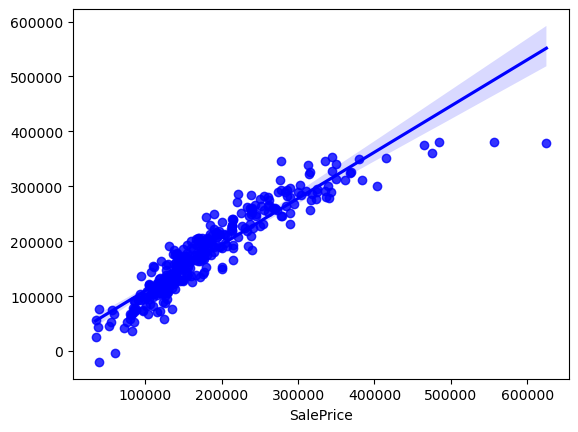

In [111]:
# Visualizing the predicteed values
sns.regplot(y_test,pred_ridge,color="b")
plt.show()

# Created Ridge regressor model and getting 85.30% R2 score using this model. From the above plot we can observe the sales price of the house. The best fit line shows there is strong linear relation between test data of trained model and predicted values

# Ensemble Techniques

# Random Forest Regressor

In [112]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
rfr=r2_score(y_test,predRFR)
print('R2_Score:',rfr)

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predRFR))
print('MSE:',metrics.mean_squared_error(y_test, predRFR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

# Checking cv score for Lasso Regression
rfr_cv=cross_val_score(RFR,x,y,cv=5).mean()
print("Cross Validation Score:",rfr_cv)
dif4=rfr-rfr_cv

R2_Score: 0.8988212970888817
MAE: 17905.965754985755
MSE: 717389221.9838017
RMSE: 26784.122572595163
Cross Validation Score: 0.82755225778298


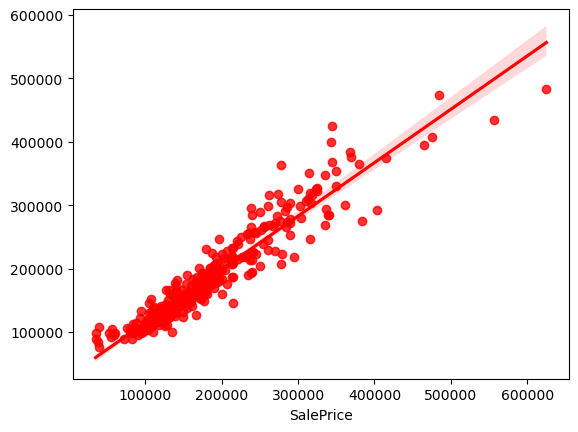

In [113]:
# Visualizing the predicteed values
sns.regplot(y_test,predRFR,color="r")
plt.show()

# Created Random Forest Regressor model and getting 90.16% R2 score using this model.From the above plot we can observe the sales price of the house. The best fit line shows there is strong linear relation between test data of trained model and predicted values.

# ExtraTrees Regressor

In [114]:
# Checking R2 score for Extra Trees Regressor

XT=ExtraTreesRegressor()
XT.fit(x_train,y_train)

# prediction
predXT=XT.predict(x_test)
etr=r2_score(y_test,predXT)
print('R2_Score:',etr)

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predXT))
print('MSE:',metrics.mean_squared_error(y_test, predXT))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predXT)))

# Checking cv score for ExtraTreesRegressor
etr_cv=cross_val_score(XT,x,y,cv=5).mean()
print("Cross Validation Score:",etr_cv)
dif5=etr-etr_cv

R2_Score: 0.9072322956881369
MAE: 18252.676524216527
MSE: 657752563.5999999
RMSE: 25646.687185677605
Cross Validation Score: 0.8330157812949924


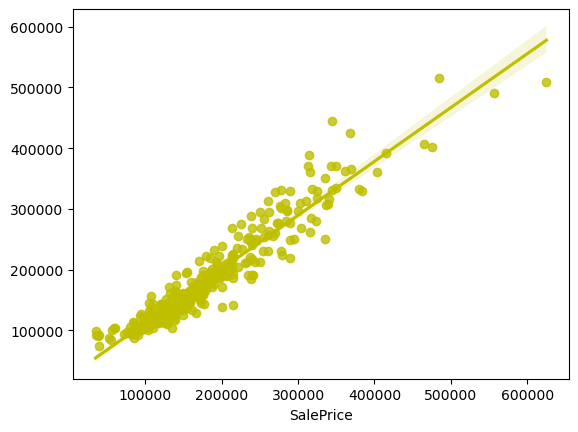

In [115]:
# Visualizing the predicteed values
sns.regplot(y_test,predXT,color="y")
plt.show()

# Created ExtraTrees Regressor model and getting 89.02% R2 score using this model. From the above plot we can observe the sales price of the house. The best fit line shows there is strong linear relation between test data of trained model and predicted values.

In [116]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
gbr=r2_score(y_test,predGB)
print('R2_Score:',gbr)

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predGB))
print('MSE:',metrics.mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))

# Checking cv score for Gradient Boosting Regressor
gbr_cv=cross_val_score(GB,x,y,cv=5).mean()
print("Cross Validation Score:",gbr_cv)
dif6=gbr-gbr_cv

R2_Score: 0.9266366266064074
MAE: 16374.944128807738
MSE: 520169678.46652526
RMSE: 22807.228645026673
Cross Validation Score: 0.8213543572538269


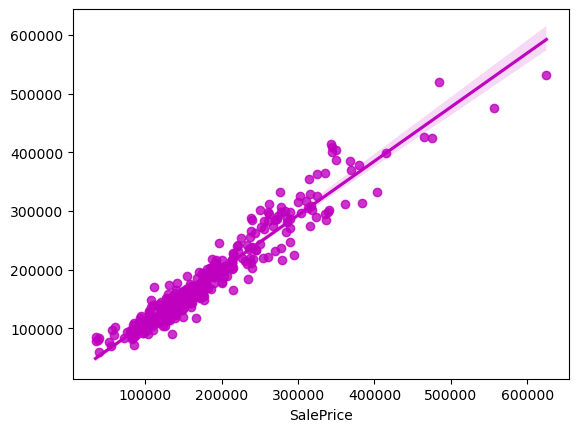

In [117]:
# Visualizing the predicteed values
sns.regplot(y_test,predGB,color="m")
plt.show()

Created GradientBoosting Regressor model and getting 90.63% R2 score using this model. From the above plot we can observe the sales price of the house. The best fit line shows there is strong linear relation between test data of trained model and predicted values.

In [118]:
model_list=['Linear Regressor','Lasso Regressor','Ridge Regressor','Random Forest Regressor','Extra Trees Regressor','Gradient Boosting Regressor']

In [119]:
accuracyscore=[lir,las,rid,rfr,etr,gbr]

In [120]:
crossvalidationscore=[lr_cv,las_cv,rid_cv,rfr_cv,etr_cv,gbr_cv]

In [121]:
models=pd.DataFrame({})
models["Regressor Type"]=model_list
models["Accuracy score"]=accuracyscore
models["Cross validation Score"]=crossvalidationscore

models

Regressor Type  Accuracy score  Cross validation Score
0             Linear Regressor        0.860812                0.801539
1              Lasso Regressor        0.860820                0.801563
2              Ridge Regressor        0.861789                0.805635
3      Random Forest Regressor        0.898821                0.827552
4        Extra Trees Regressor        0.907232                0.833016
5  Gradient Boosting Regressor        0.926637                0.821354

# From the difference between R2 score and Cross Validation Score I can conclude that Lasso Regressor as my best fitting model as it is giving less difference compare to other models. Let's perform Hyperparameter tuning to increase the model accuracy.

# Hyper Parameter Tuning

In [122]:
# Checking best alpha value
parameters={'alpha':[1e-15,1e-10, 1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso=Lasso()
clf=GridSearchCV(lasso,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 100}


In [123]:
GCV=GridSearchCV(Lasso(),parameters,cv=5)

In [124]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]})

In [125]:
# Getting best parameters
GCV.best_params_

{'alpha': 100}

R2_Score: 86.13838819072225
Mean absolute error: 21699.366576035332
Mean squared error: 982832416.8214353
Root Mean Squared error: 31350.158162622327


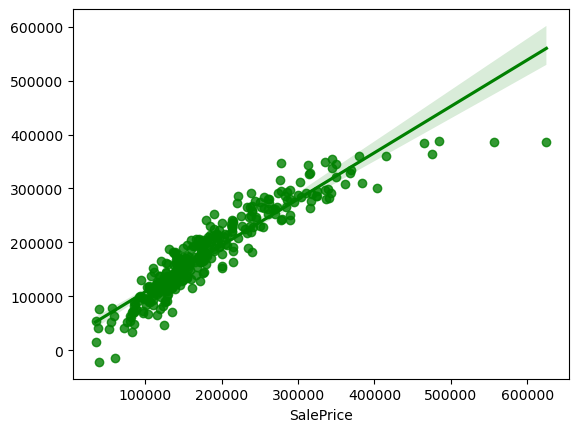

In [126]:
# Creating final model
Final_Model = Lasso(alpha=100)

# Prediction
Final_Model.fit(x_train, y_train)
pred = Final_Model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)

# Metric Evaluation
print('Mean absolute error:',metrics.mean_absolute_error(y_test, pred))
print('Mean squared error:',metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared error:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

# Visualizing the predicteed values
sns.regplot(y_test,pred,color="g")
plt.show()

# Saving the Final model

In [127]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_Model,"HPP.pkl")

['HPP.pkl']

# Predicition

In [128]:
# Loading the saved model
Model=joblib.load("HPP.pkl")

#Prediction
prediction = Model.predict(x_test)
prediction

array([165400.61557642, 144469.49703722, 180086.46591656, 247227.05836357,
        76586.11418728, 265613.03691505, 193230.01430656, 111545.19730266,
       120265.65553644,  85473.73564793,  41590.45377911, 154159.72025921,
       262718.91584894, 167689.22554457, 137169.81092125, 200447.53372162,
       200797.98468444, 193858.27010574, 281765.26946824, 195039.59344436,
       152006.79119385, 168512.98414765, 123566.94622525, 296503.57666013,
        93031.14773137, 167609.66405768, 264737.73397191, 243847.58473898,
        71172.18221788, 156514.13704384, 178564.85255394, 127169.22205575,
       155146.52251409, 114404.30734331, 128301.0119173 , 169300.27214624,
       312552.58460745,  90703.51632651,  89225.00156751, 162475.67014289,
       278879.67028386, 198640.26479256, 386112.40561354, -21824.55433673,
        69624.97749152, 291419.46847979, 145020.78243805, 363953.36563939,
       265371.94538977, 135843.76977068, 152611.74144472,  75699.74534299,
       179038.36145276,  

In [129]:
pd.DataFrame([Model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

Predicted  Original
0    165400.615576  120000.0
1    144469.497037  140000.0
2    180086.465917  172500.0
3    247227.058364  244600.0
4     76586.114187   88000.0
..             ...       ...
346  127964.776080  171000.0
347  157541.739977  137500.0
348  215232.099605  194500.0
349  286758.866953  283463.0
350  147499.960192  150000.0

[351 rows x 2 columns]